In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
import matplotlib

#Setting the plotting parameters
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
matplotlib.rcParams['font.size']= 45
matplotlib.rcParams['font.family']= 'ptm' #'Times New Roman

In [3]:
def generate_error_plots():
    
    #List of plots we show
    namePlots = ["RelativeError","MaxError", "AverageMSE"]
    is_noise = ["Noise","NoNoise"]
    labels = [ r"$\texttt{rE}(j)$",r"$\texttt{maxE}(j)$", r"$\texttt{mse}(j)$"]
    
    if not os.path.exists('saved_plots'):
        os.mkdir('saved_plots')
    
    for pde_name in ['Fisher','Heat','Linadv']:            
        for it, name in enumerate(namePlots):                
                is_data = False
                
                if pde_name=="Linadv":
                    count = 0
                    fig = plt.figure(figsize=[15,10],dpi=300)
                    for ispreserved in ["Preserve","NoPreserve"]:
                        
                        ymax = 1000
                        colors = ['k','r','c','g']
                        labelsNoise = ["Noise injection \n Norm preserved", \
                            "Clean data \n Norm preserved", \
                            "Noise injection \n Norm not preserved", \
                            "Clean data \n Norm not preserved"] 
                        for jj, isnoise in enumerate(is_noise):
                        
                            try:
                                df = pd.read_csv(f'saved_test_results/{pde_name}{name}{ispreserved}{isnoise}.csv',header=None)
                                is_data = True
                            except:
                                print(f"Missing data for the {name} of {pde_name}, with {ispreserved}")
                                
                            xx = np.arange(0,40)
                            if is_data:
                                plt.semilogy(xx[1:],df.iloc[1:len(xx),-1],'-o',c=colors[count])
                                plt.semilogy(xx[1],df.iloc[1,-1],'-o',c=colors[count],label=labelsNoise[count])
                                plt.grid(True)
                                if it==1:
                                    plt.legend(loc='lower center',ncols=2,fontsize=25)
                            else:
                                print(f"There is nothing saved to generate the plots of {name} in {pde_name}")
                            
                            count += 1
                            
                    if is_data:
                        plt.yticks(fontsize=45)
                        plt.xticks(fontsize=45)
                        plt.xlabel("Number of iterations",fontsize=45)
                        plt.ylabel(f"{labels[it]}",fontsize=45)
                        plt.ylim(1e-7,1)
                        plt.grid(True)
                        plt.savefig(f"saved_plots/{pde_name}{name}_sameyaxis.pdf", format="pdf",bbox_inches='tight')
                else:
                    
                    fig = plt.figure(figsize=[15,10],dpi=300)
                    ymax = 1000
                    colors = ['k','r']
                    labelsNoise = ["Noise injection","Clean data"] 
                    for jj, isnoise in enumerate(is_noise):
                        try:
                            df = pd.read_csv(f'saved_test_results/{pde_name}{name}{isnoise}.csv',header=None)
                            is_data = True
                        except:
                            print(f"Missing data for the {name} of {pde_name}")
                            
                        xx = np.arange(0,40)
                        if is_data:
                            plt.semilogy(xx[1:],df.iloc[1:len(xx),-1],'-o',c=colors[jj])
                            plt.semilogy(xx[1],df.iloc[1,-1],'-o',c=colors[jj],label=labelsNoise[jj])
                            plt.grid(True)
                            if it==1:
                                plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.),ncols=2,fontsize=25)
                        else:
                            print(f"There is nothing saved to generate the plots of {name} in {pde_name}")
                    if is_data:
                        plt.yticks(fontsize=45)
                        plt.xticks(fontsize=45)
                        plt.grid(True)
                        plt.ylim(1e-9,1)
                        plt.xlabel("Number of iterations",fontsize=45)
                        plt.ylabel(f"{labels[it]}",fontsize=45)
                        tit = "Simulation with noise" if isnoise=="Noise" else "Simulation without noise"
                        #plt.title(tit)
                        #ymax = np.max(df.iloc[:,-1])
                        #ymin = 0
                        #ylist = np.linspace(ymin,ymax,4)
                        #plt.yticks(ylist)
                        #plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                        plt.savefig(f"saved_plots/{pde_name}{name}_sameyaxis.pdf", format="pdf",bbox_inches='tight')
        print("Plots saved or updated in the directory 'saved plots'")

Plots saved or updated in the directory 'saved plots'
Plots saved or updated in the directory 'saved plots'
Plots saved or updated in the directory 'saved plots'


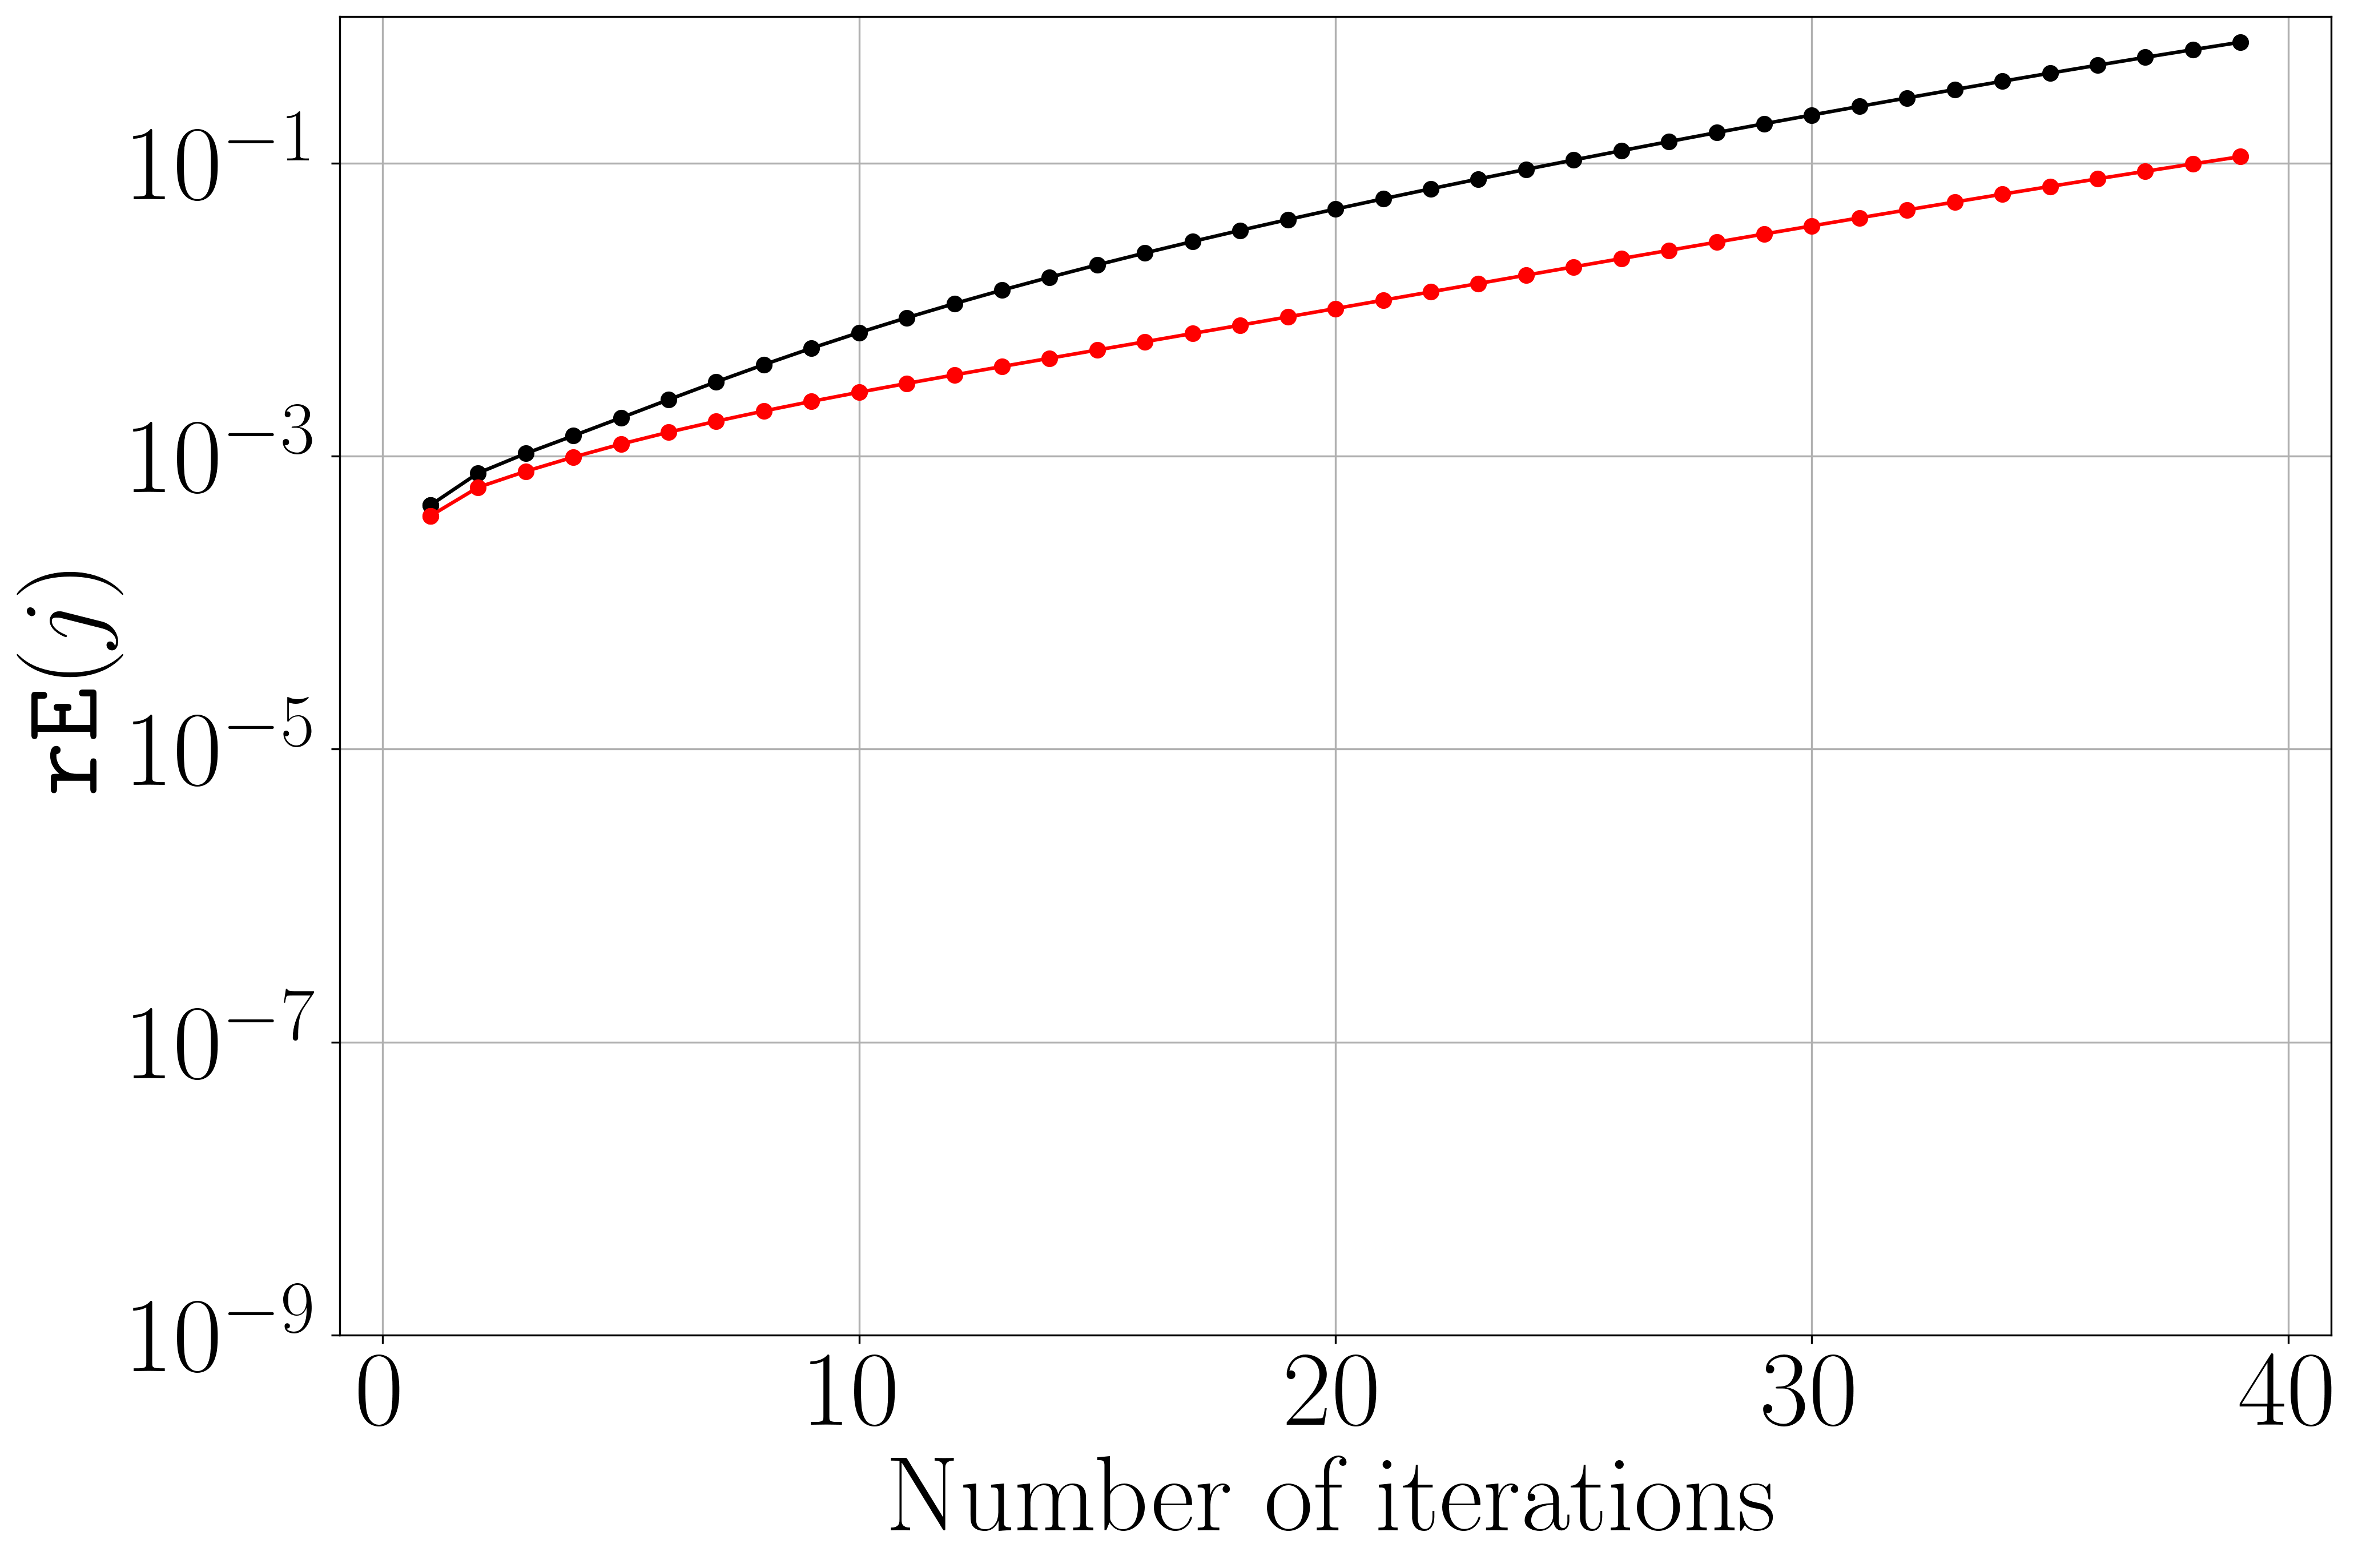

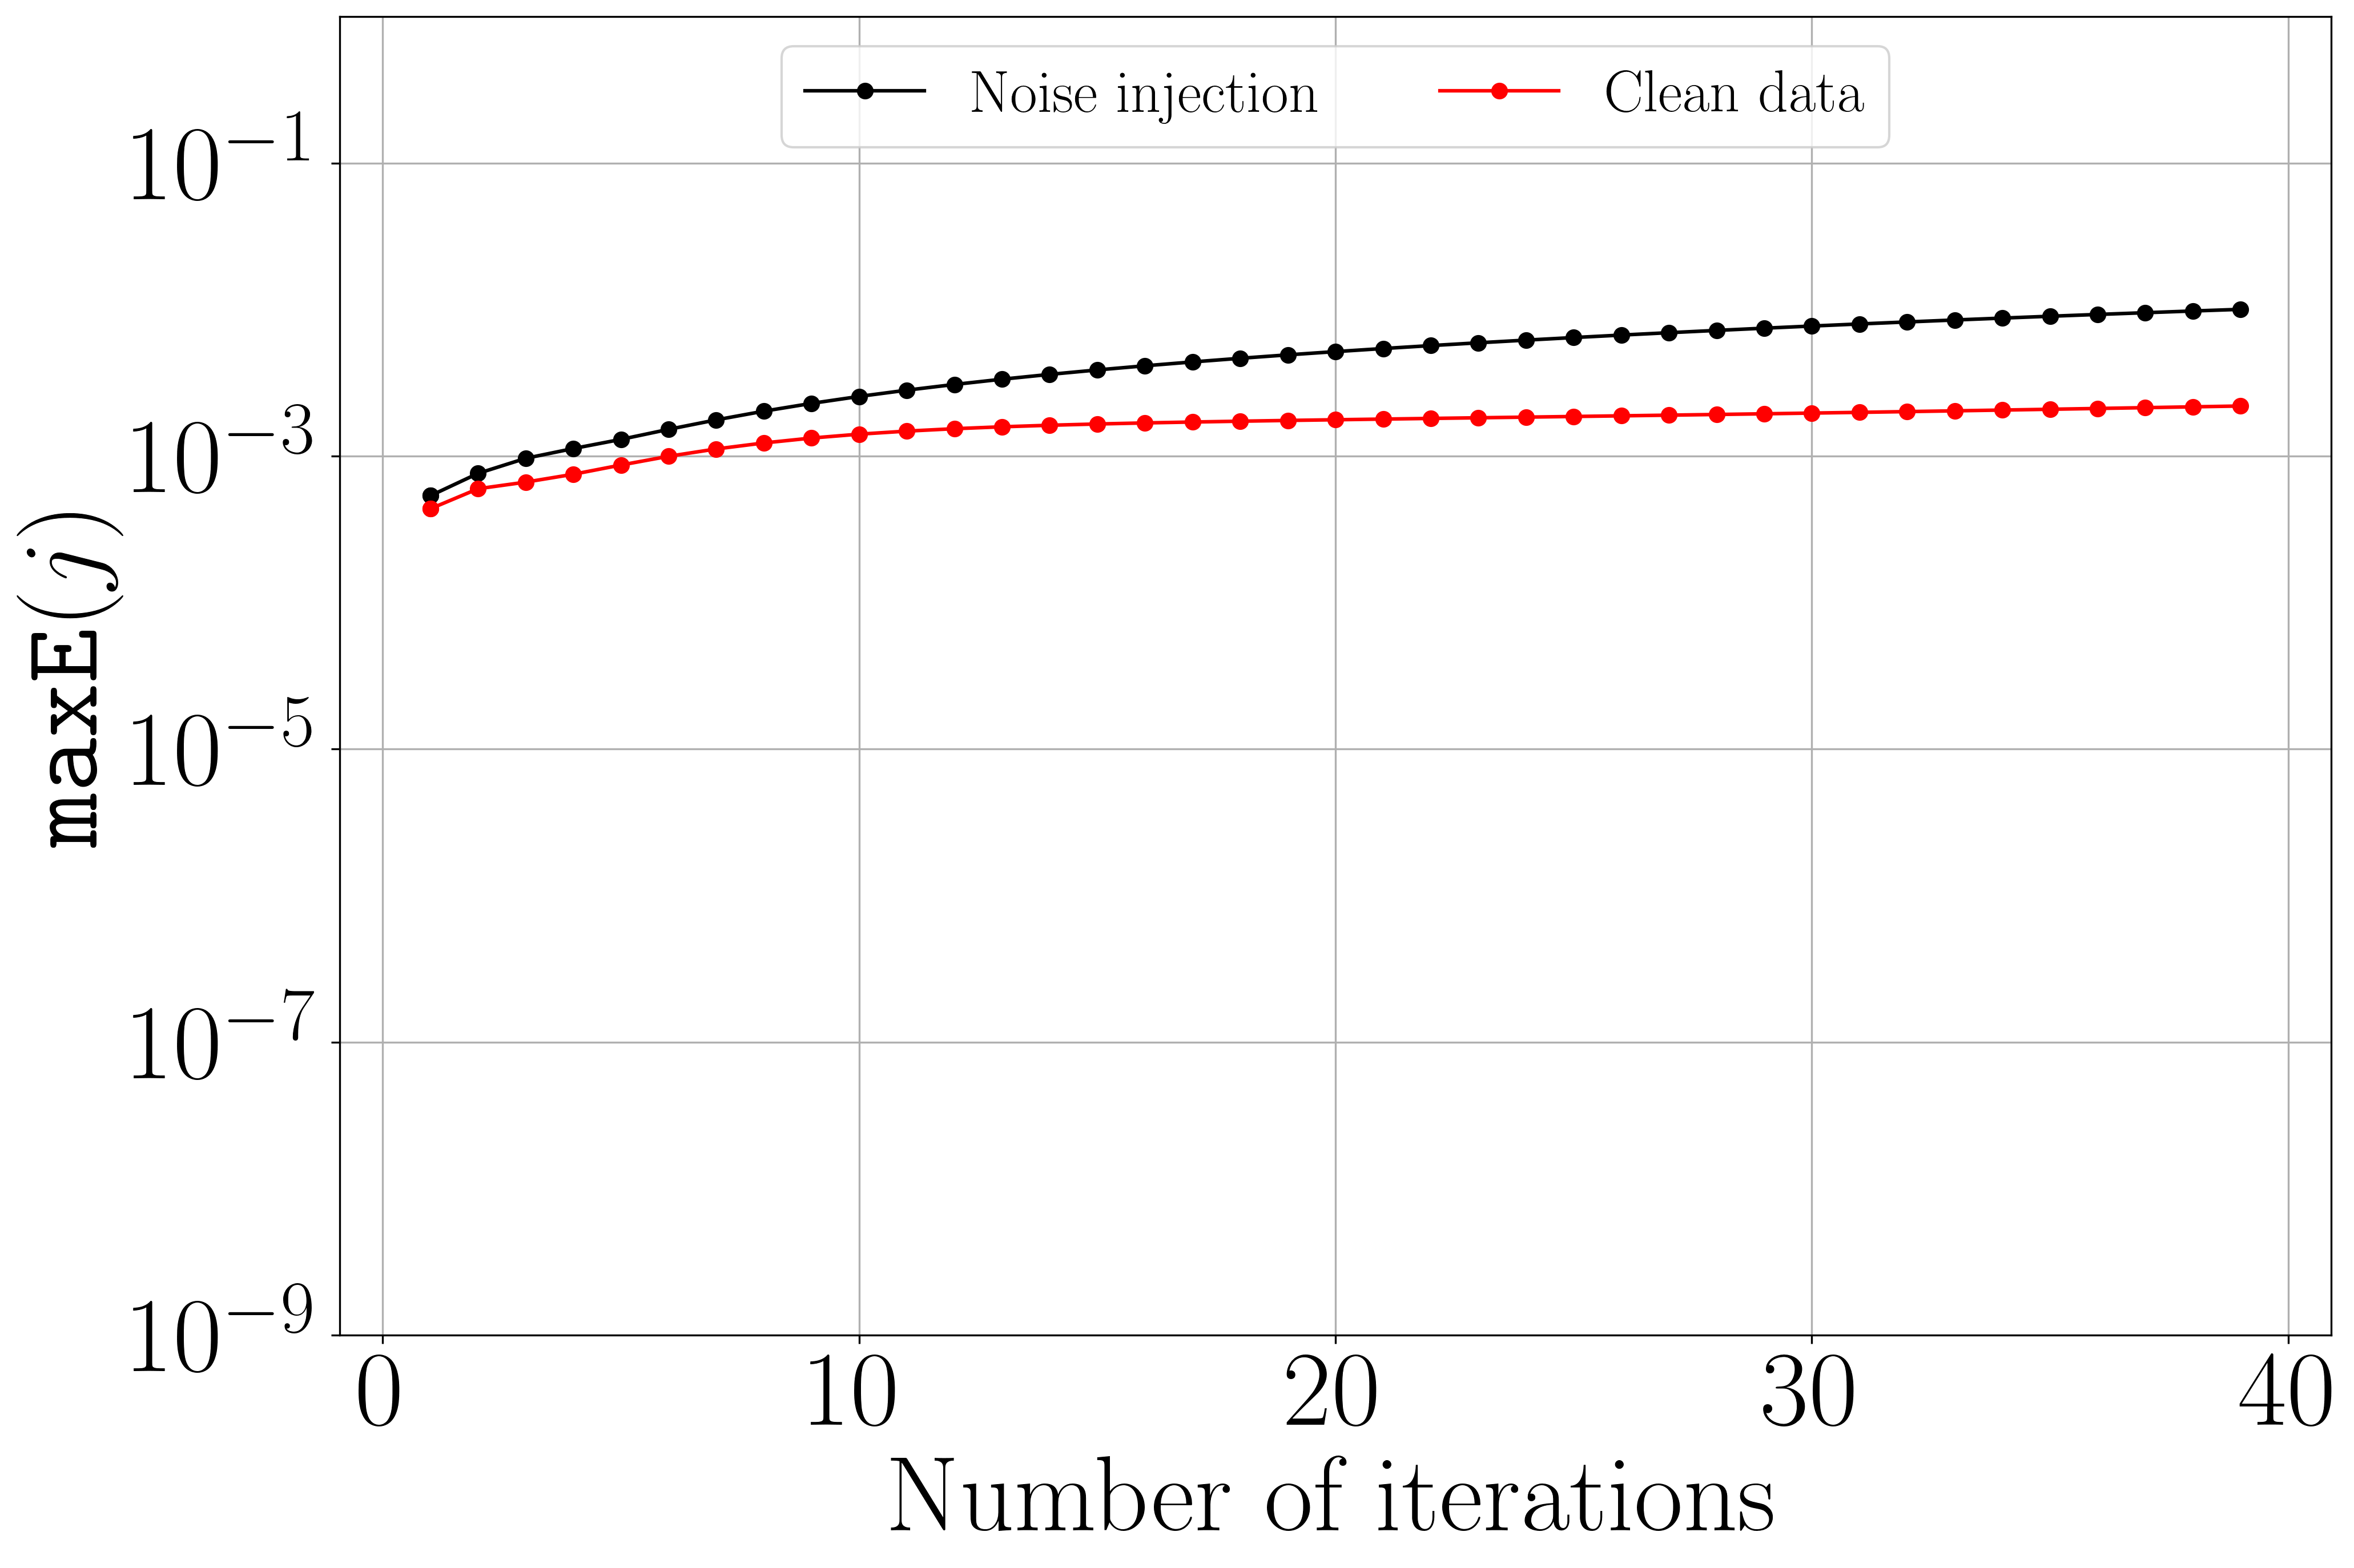

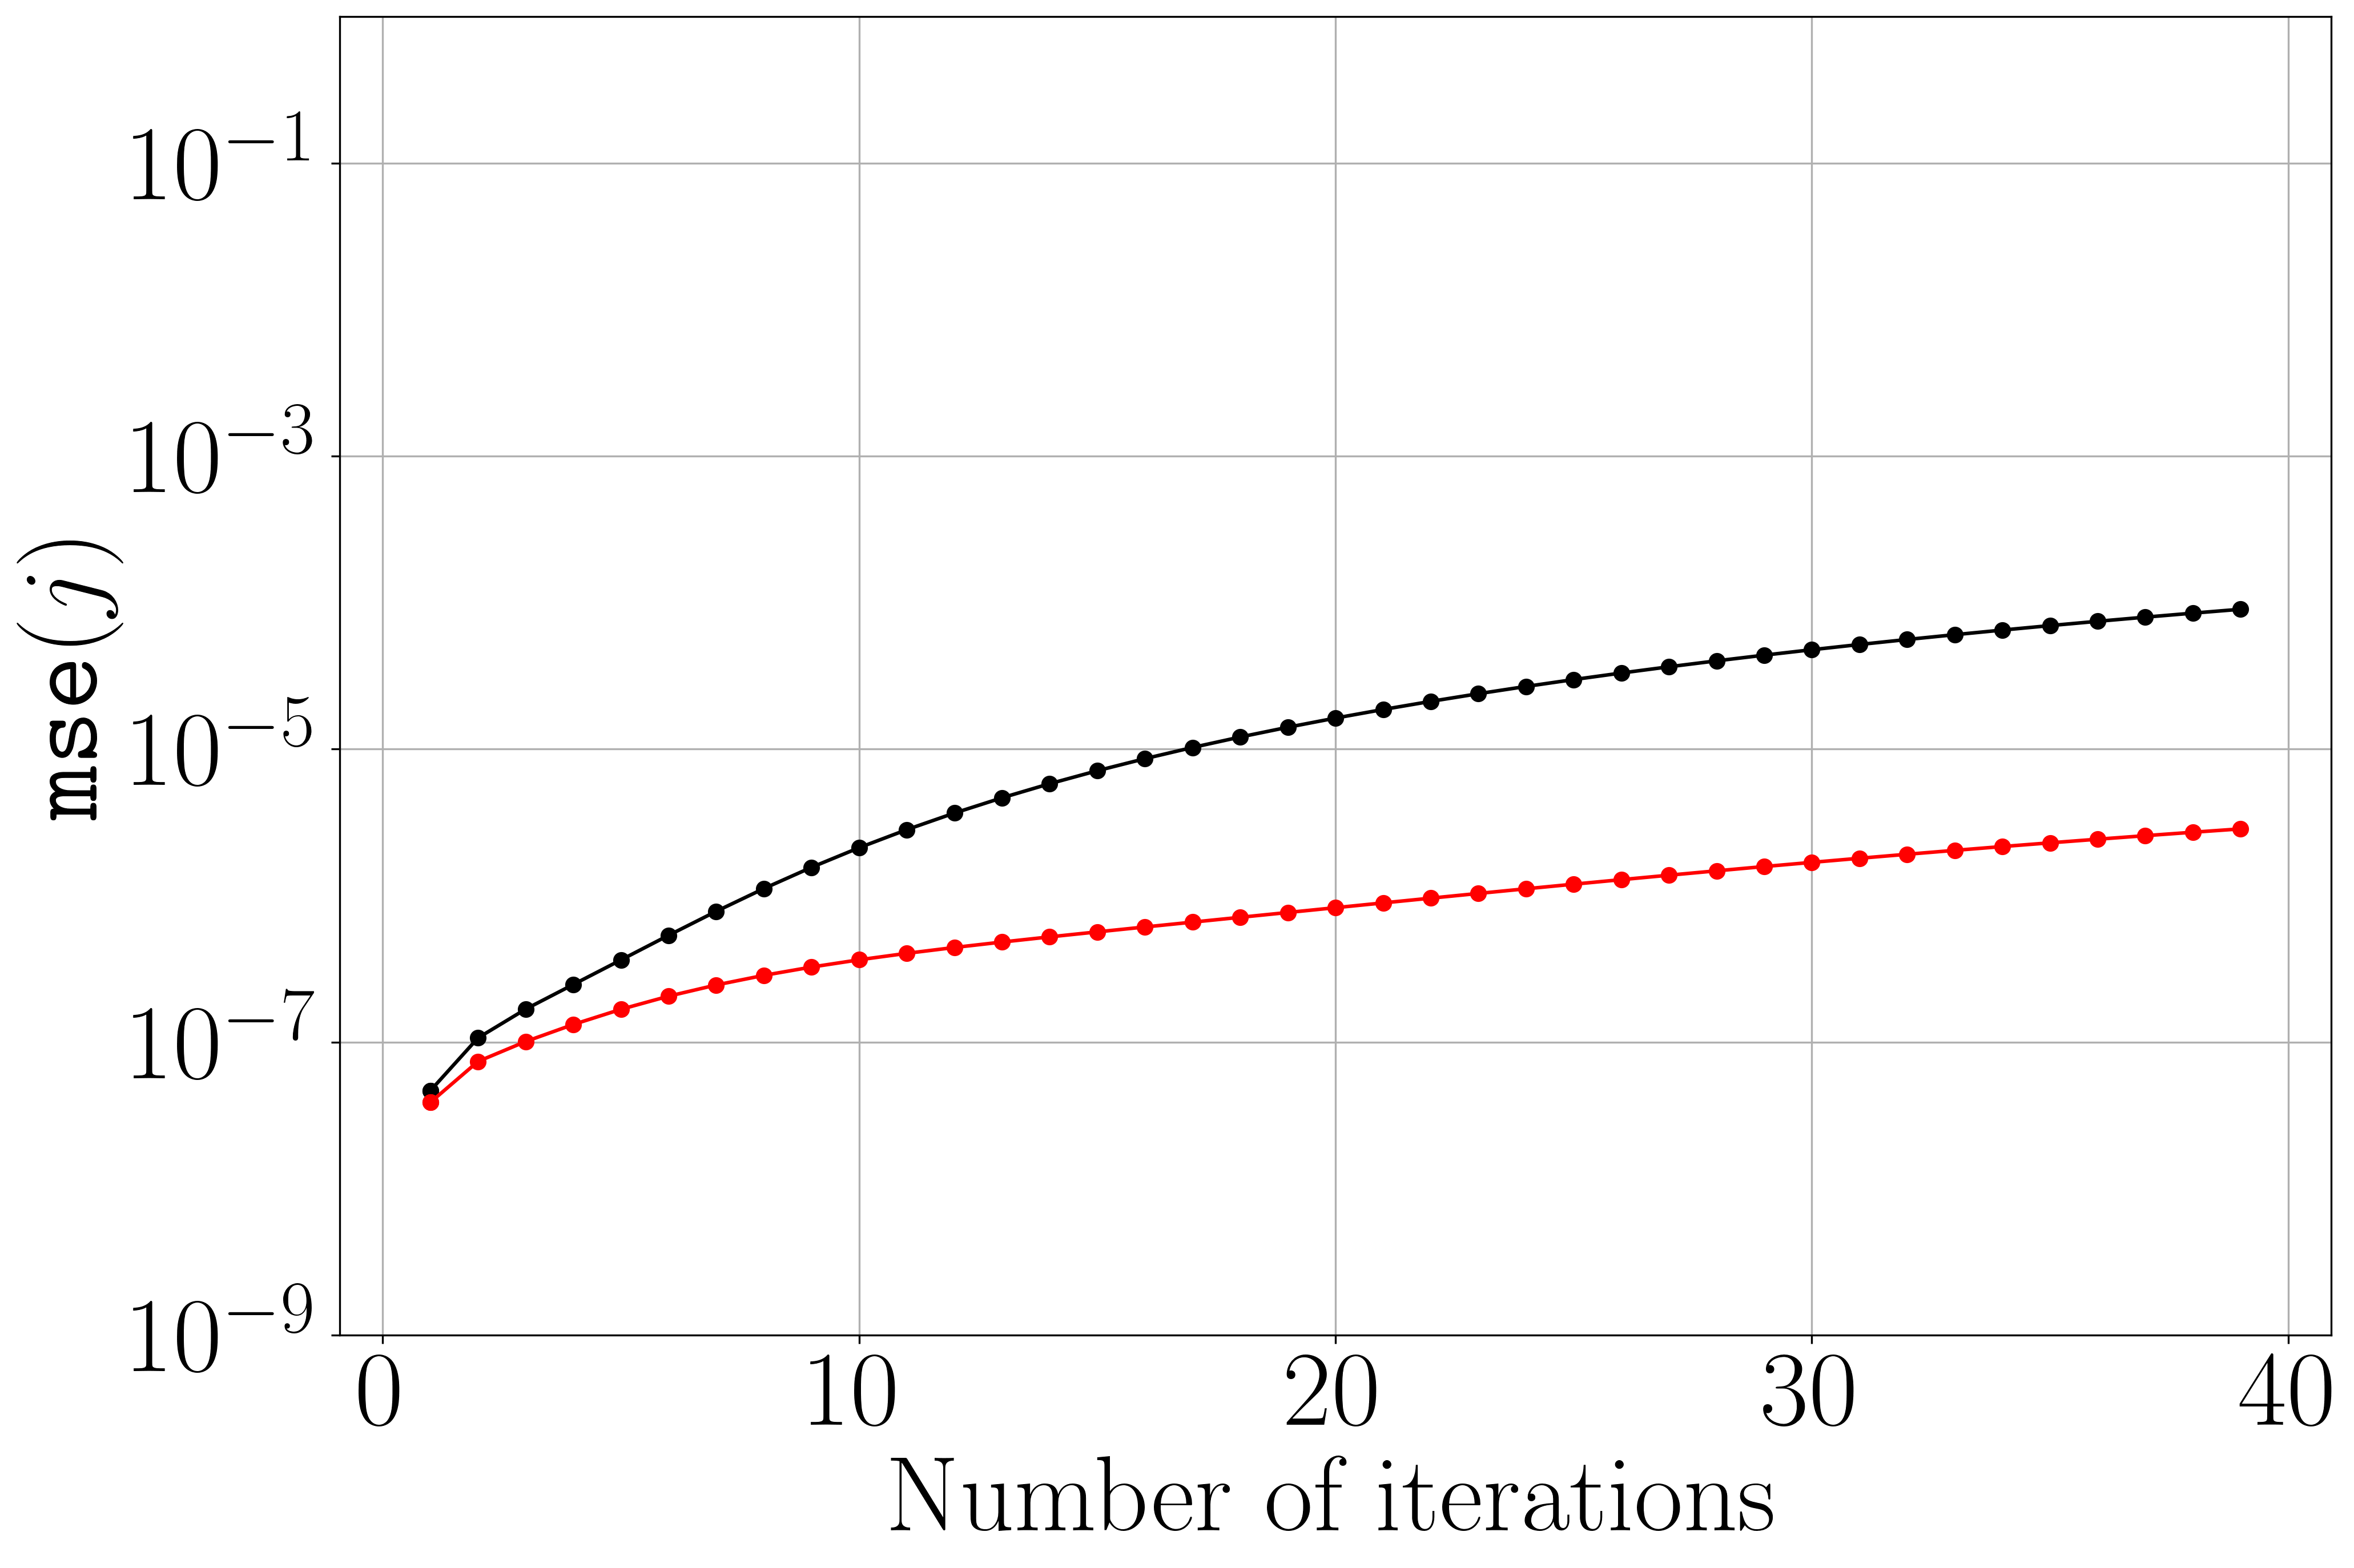

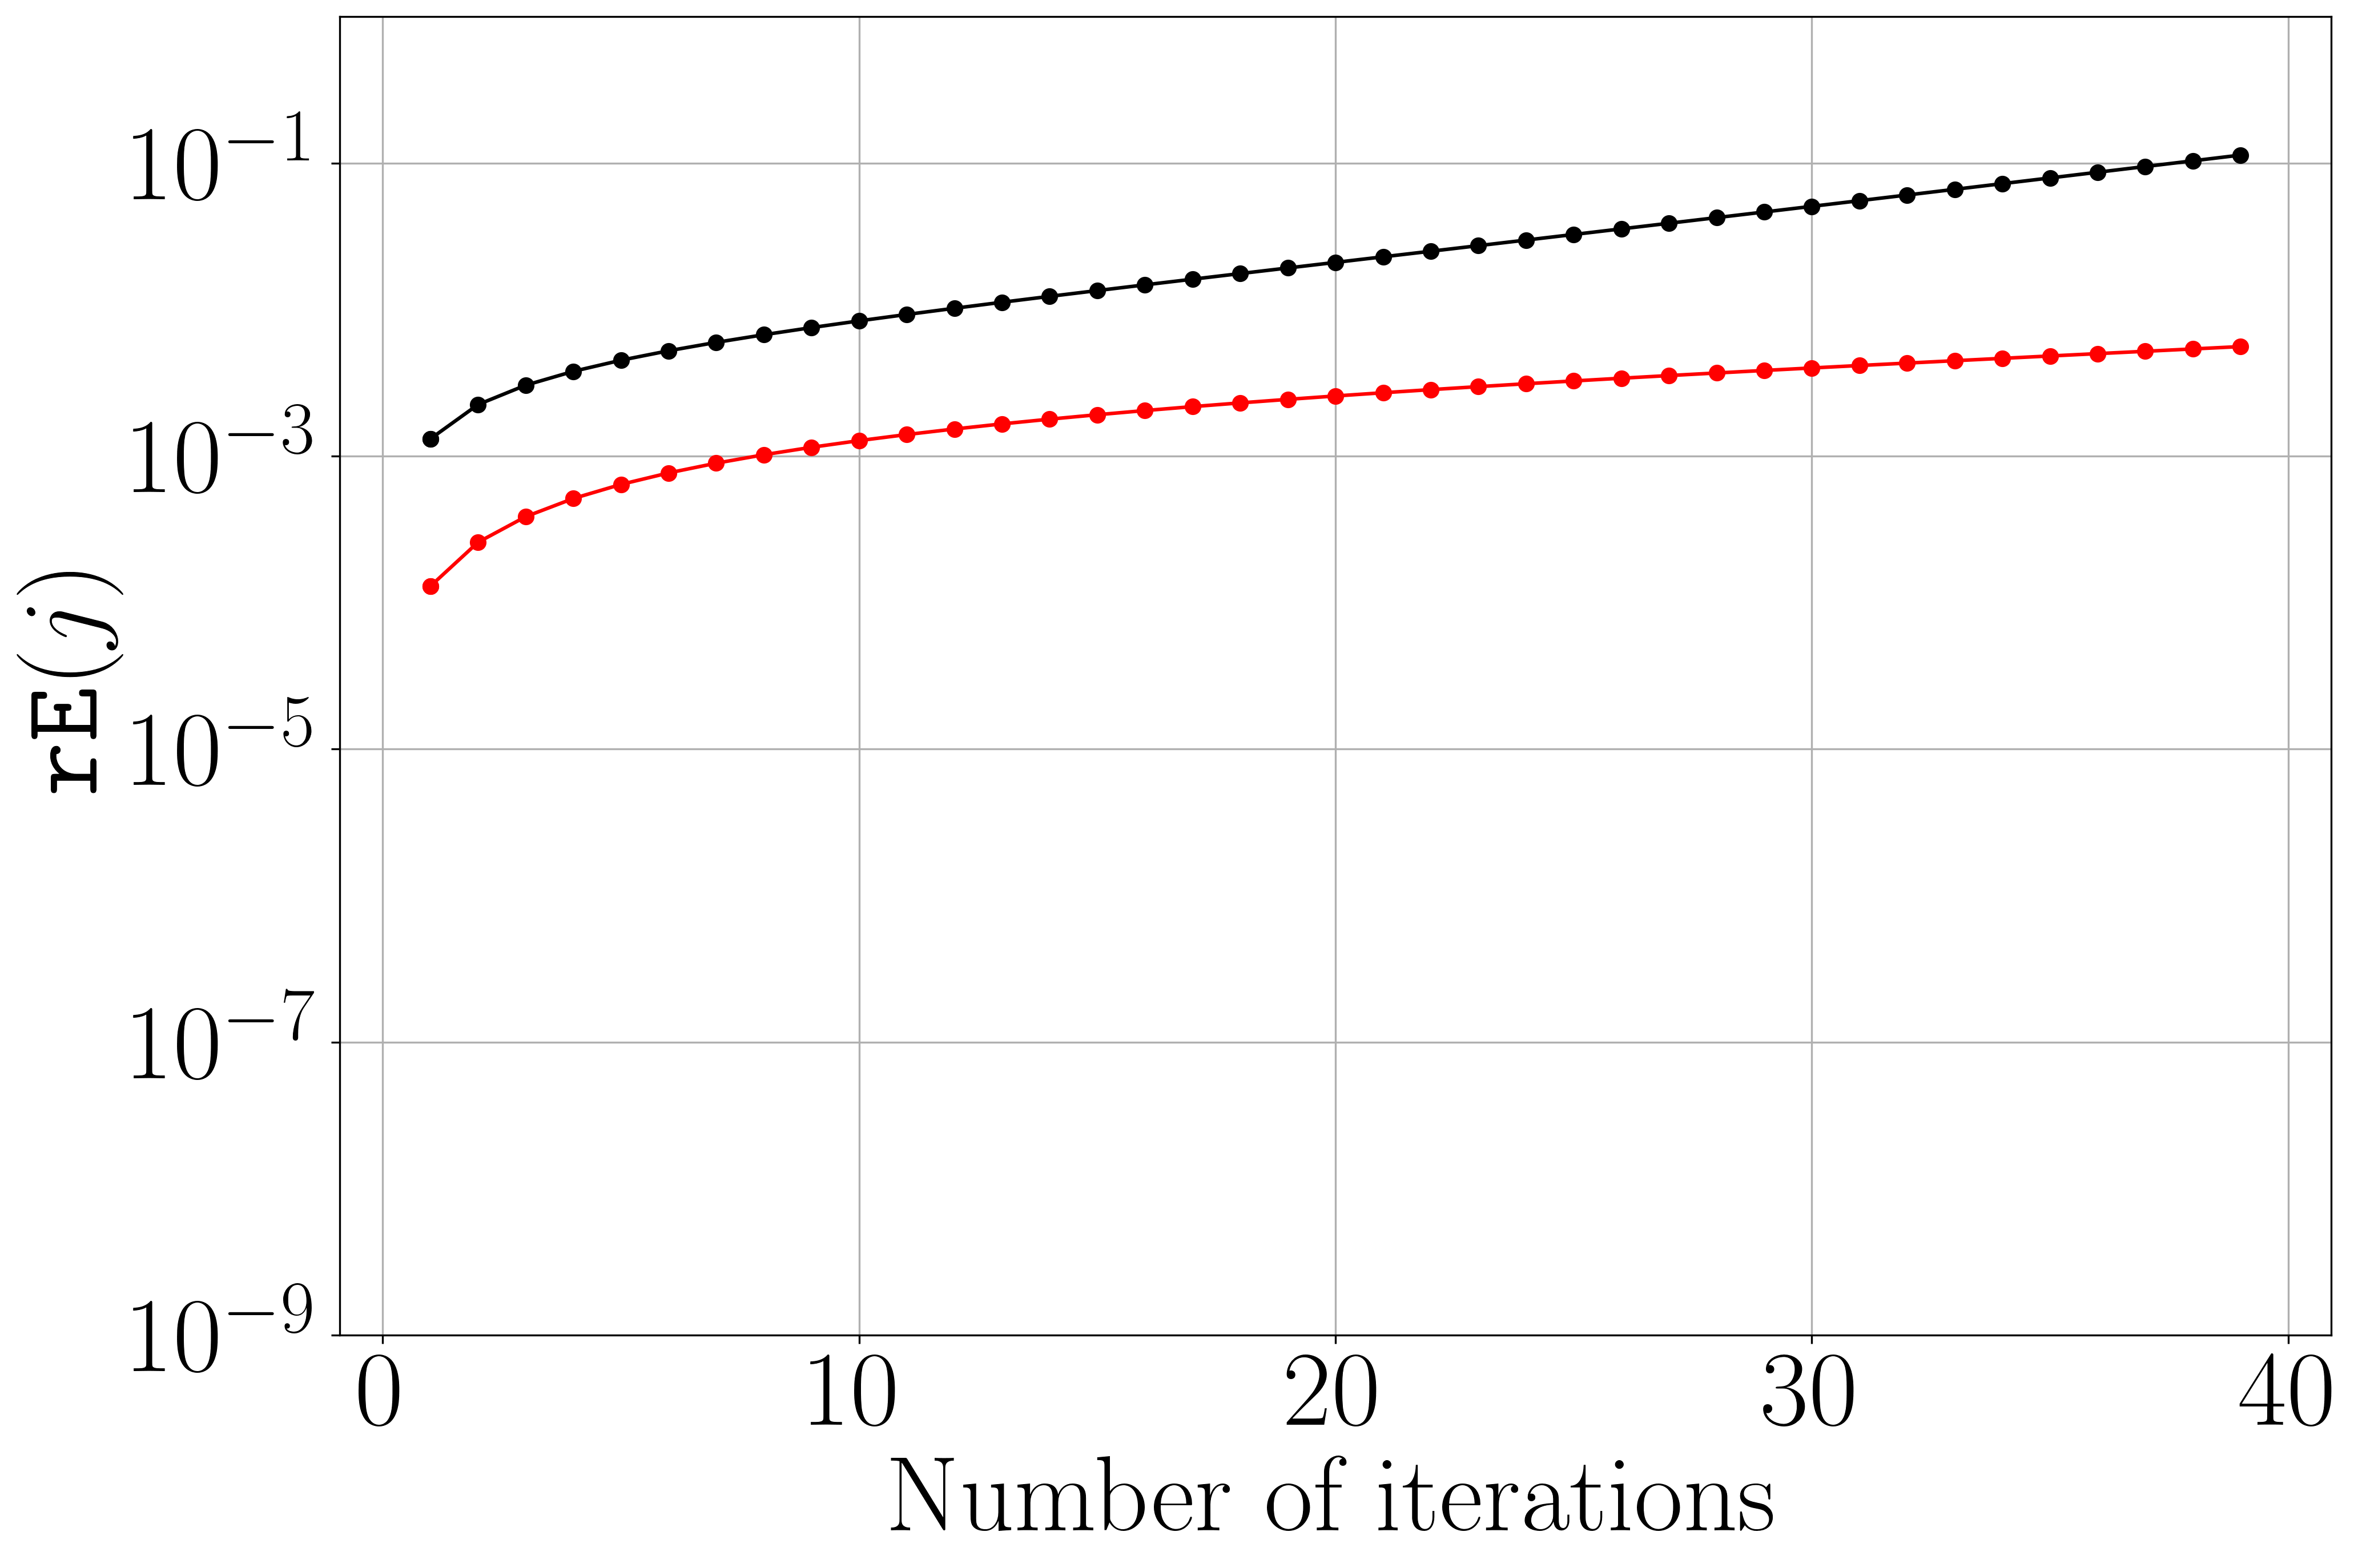

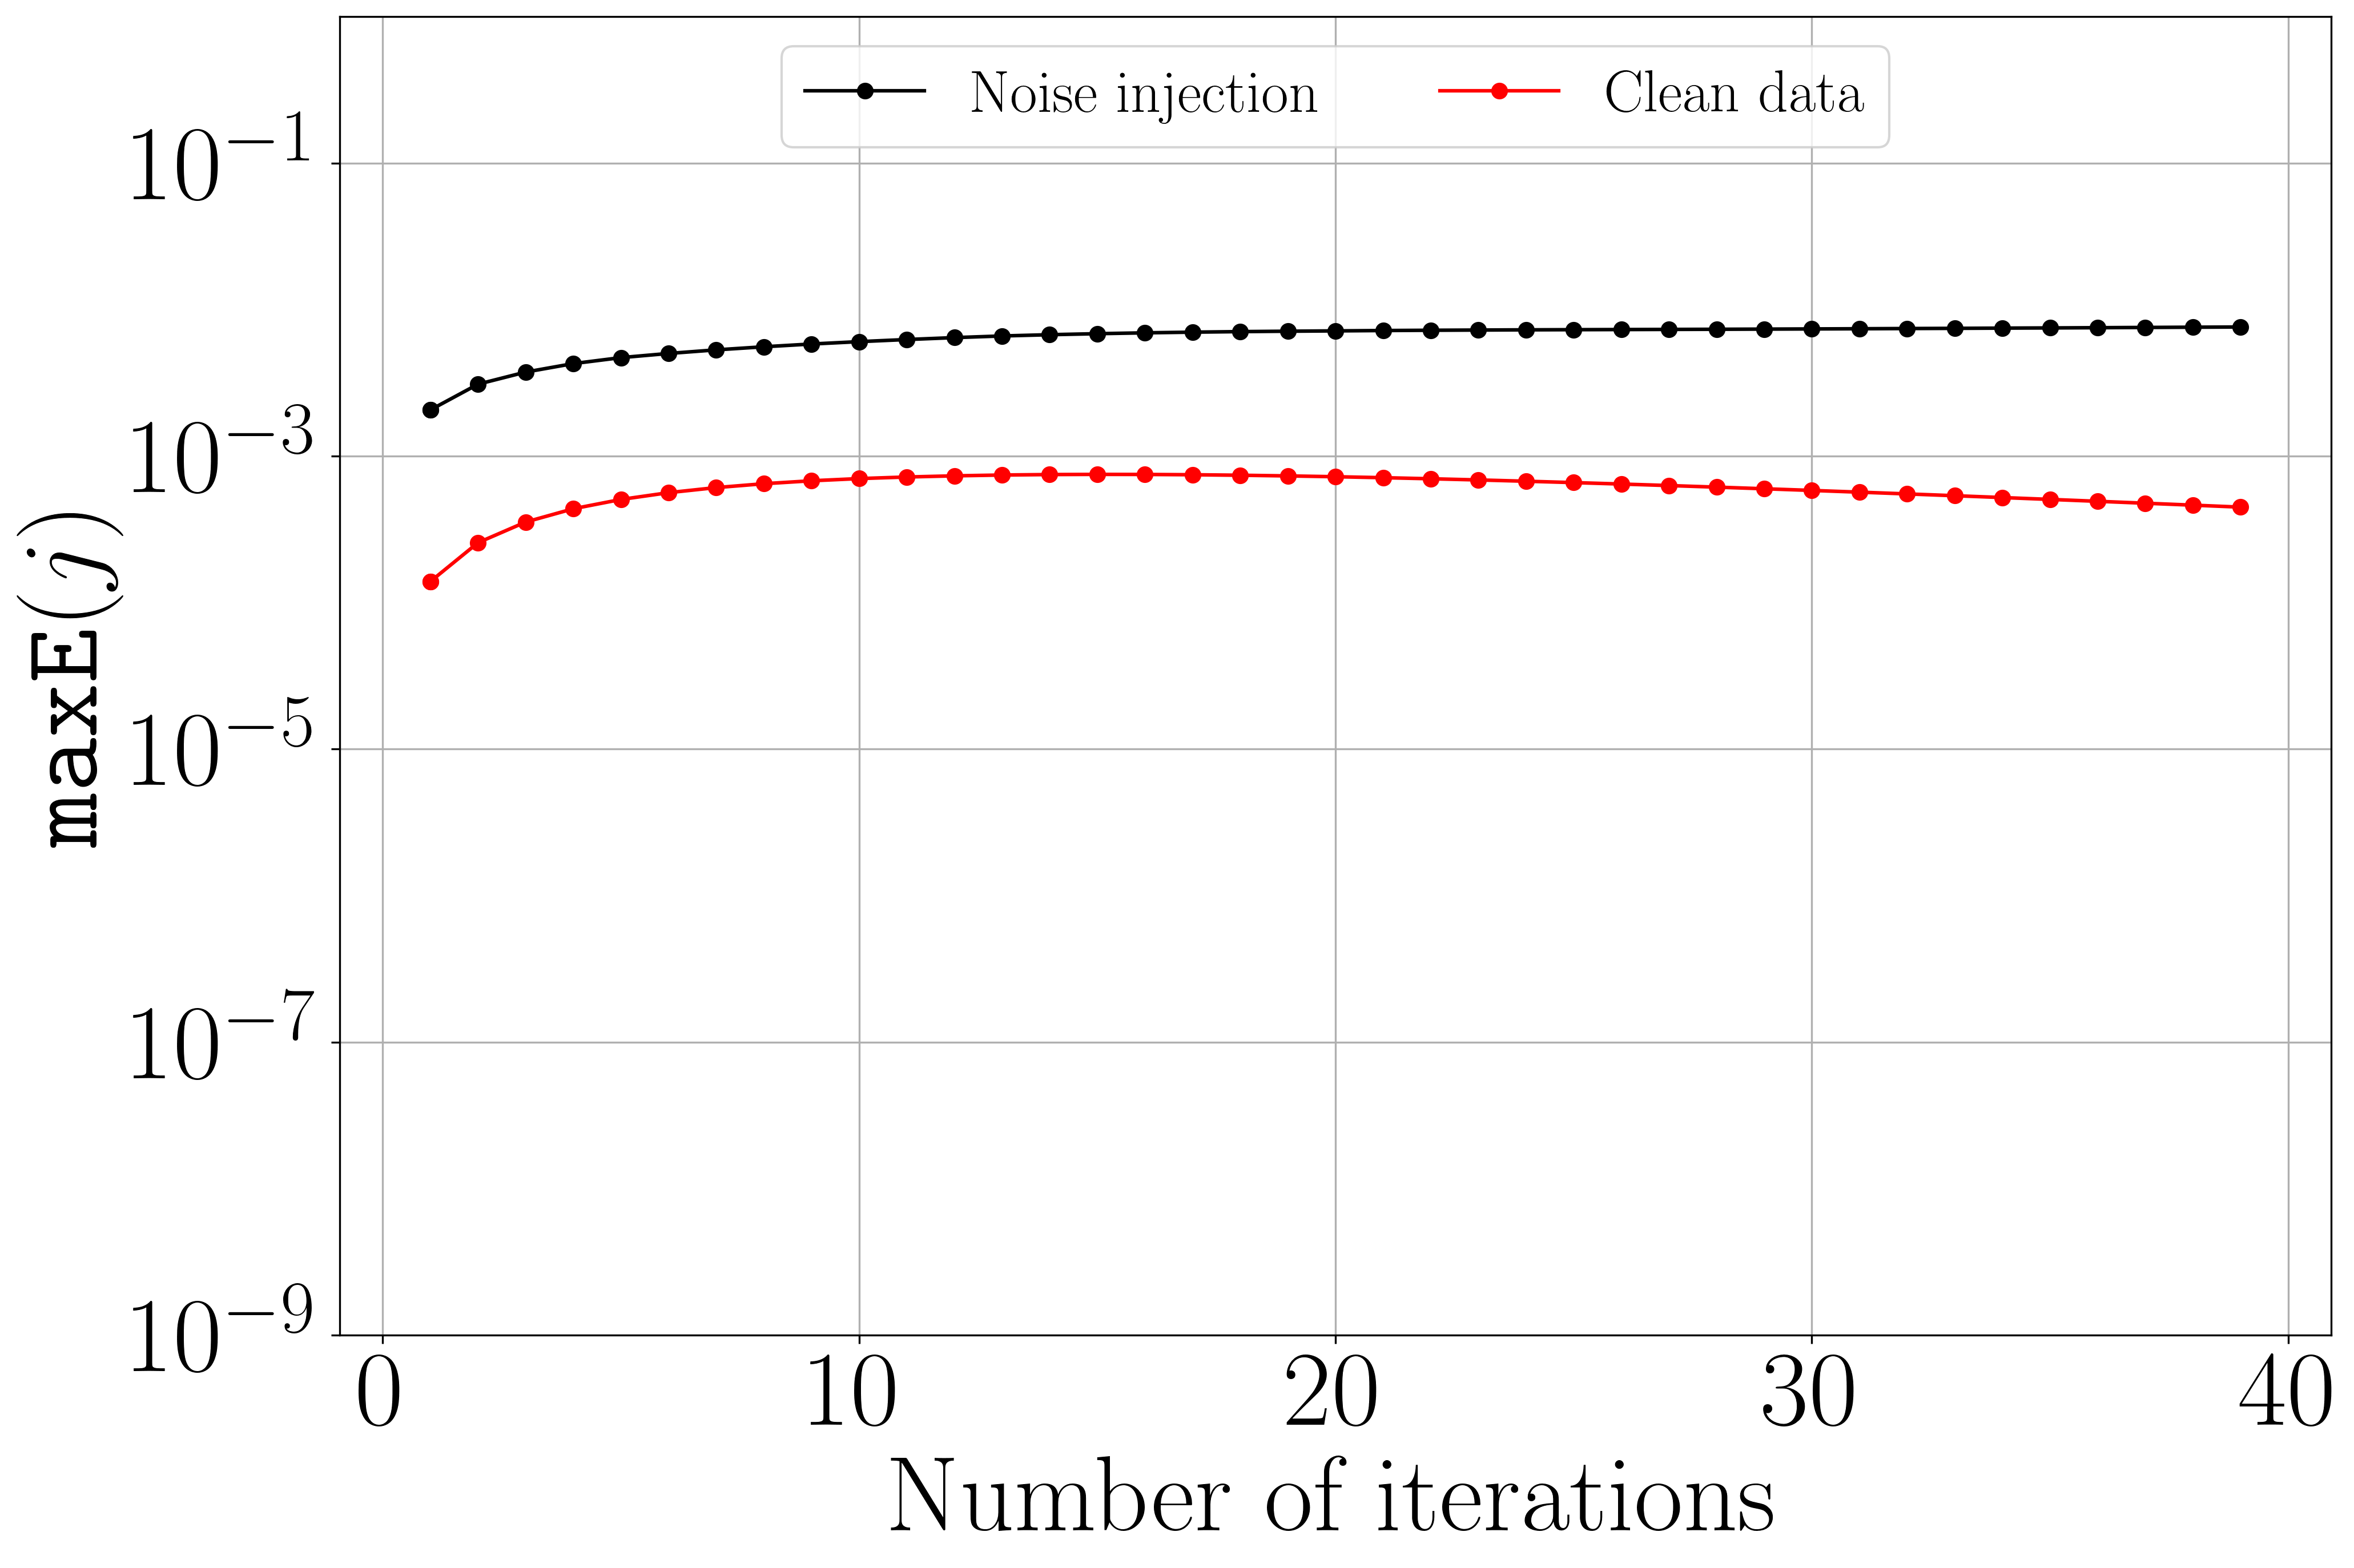

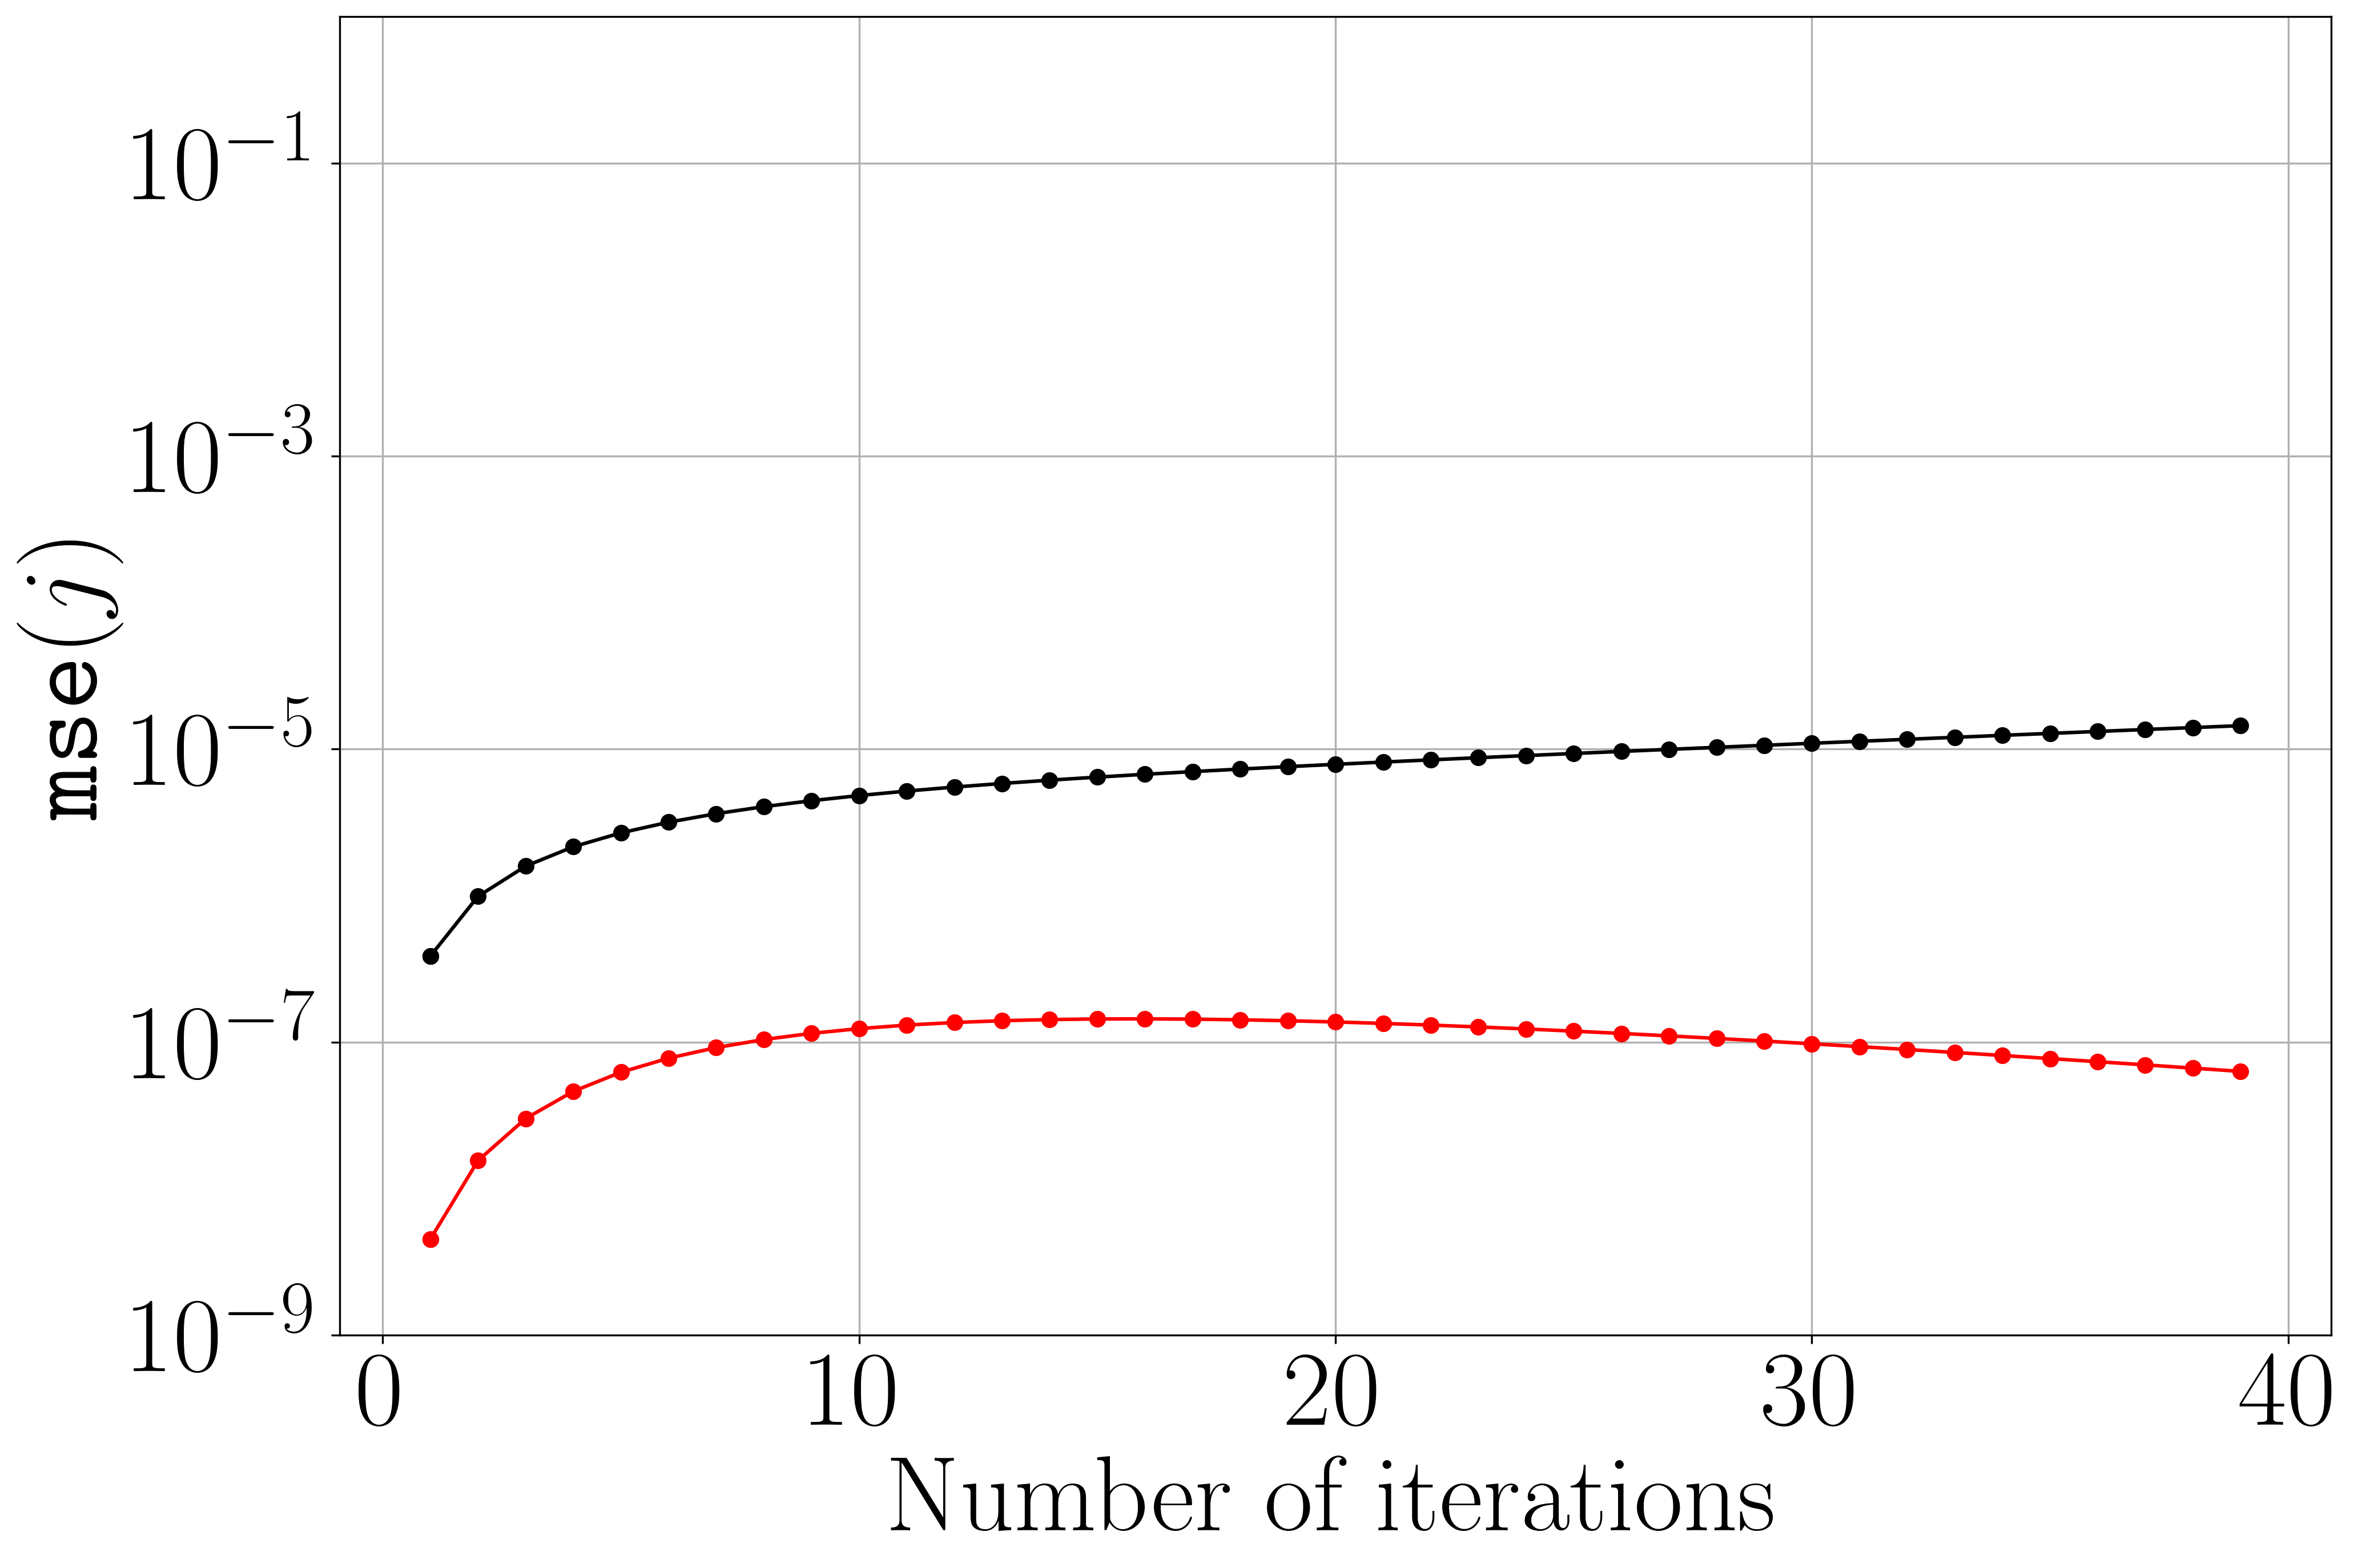

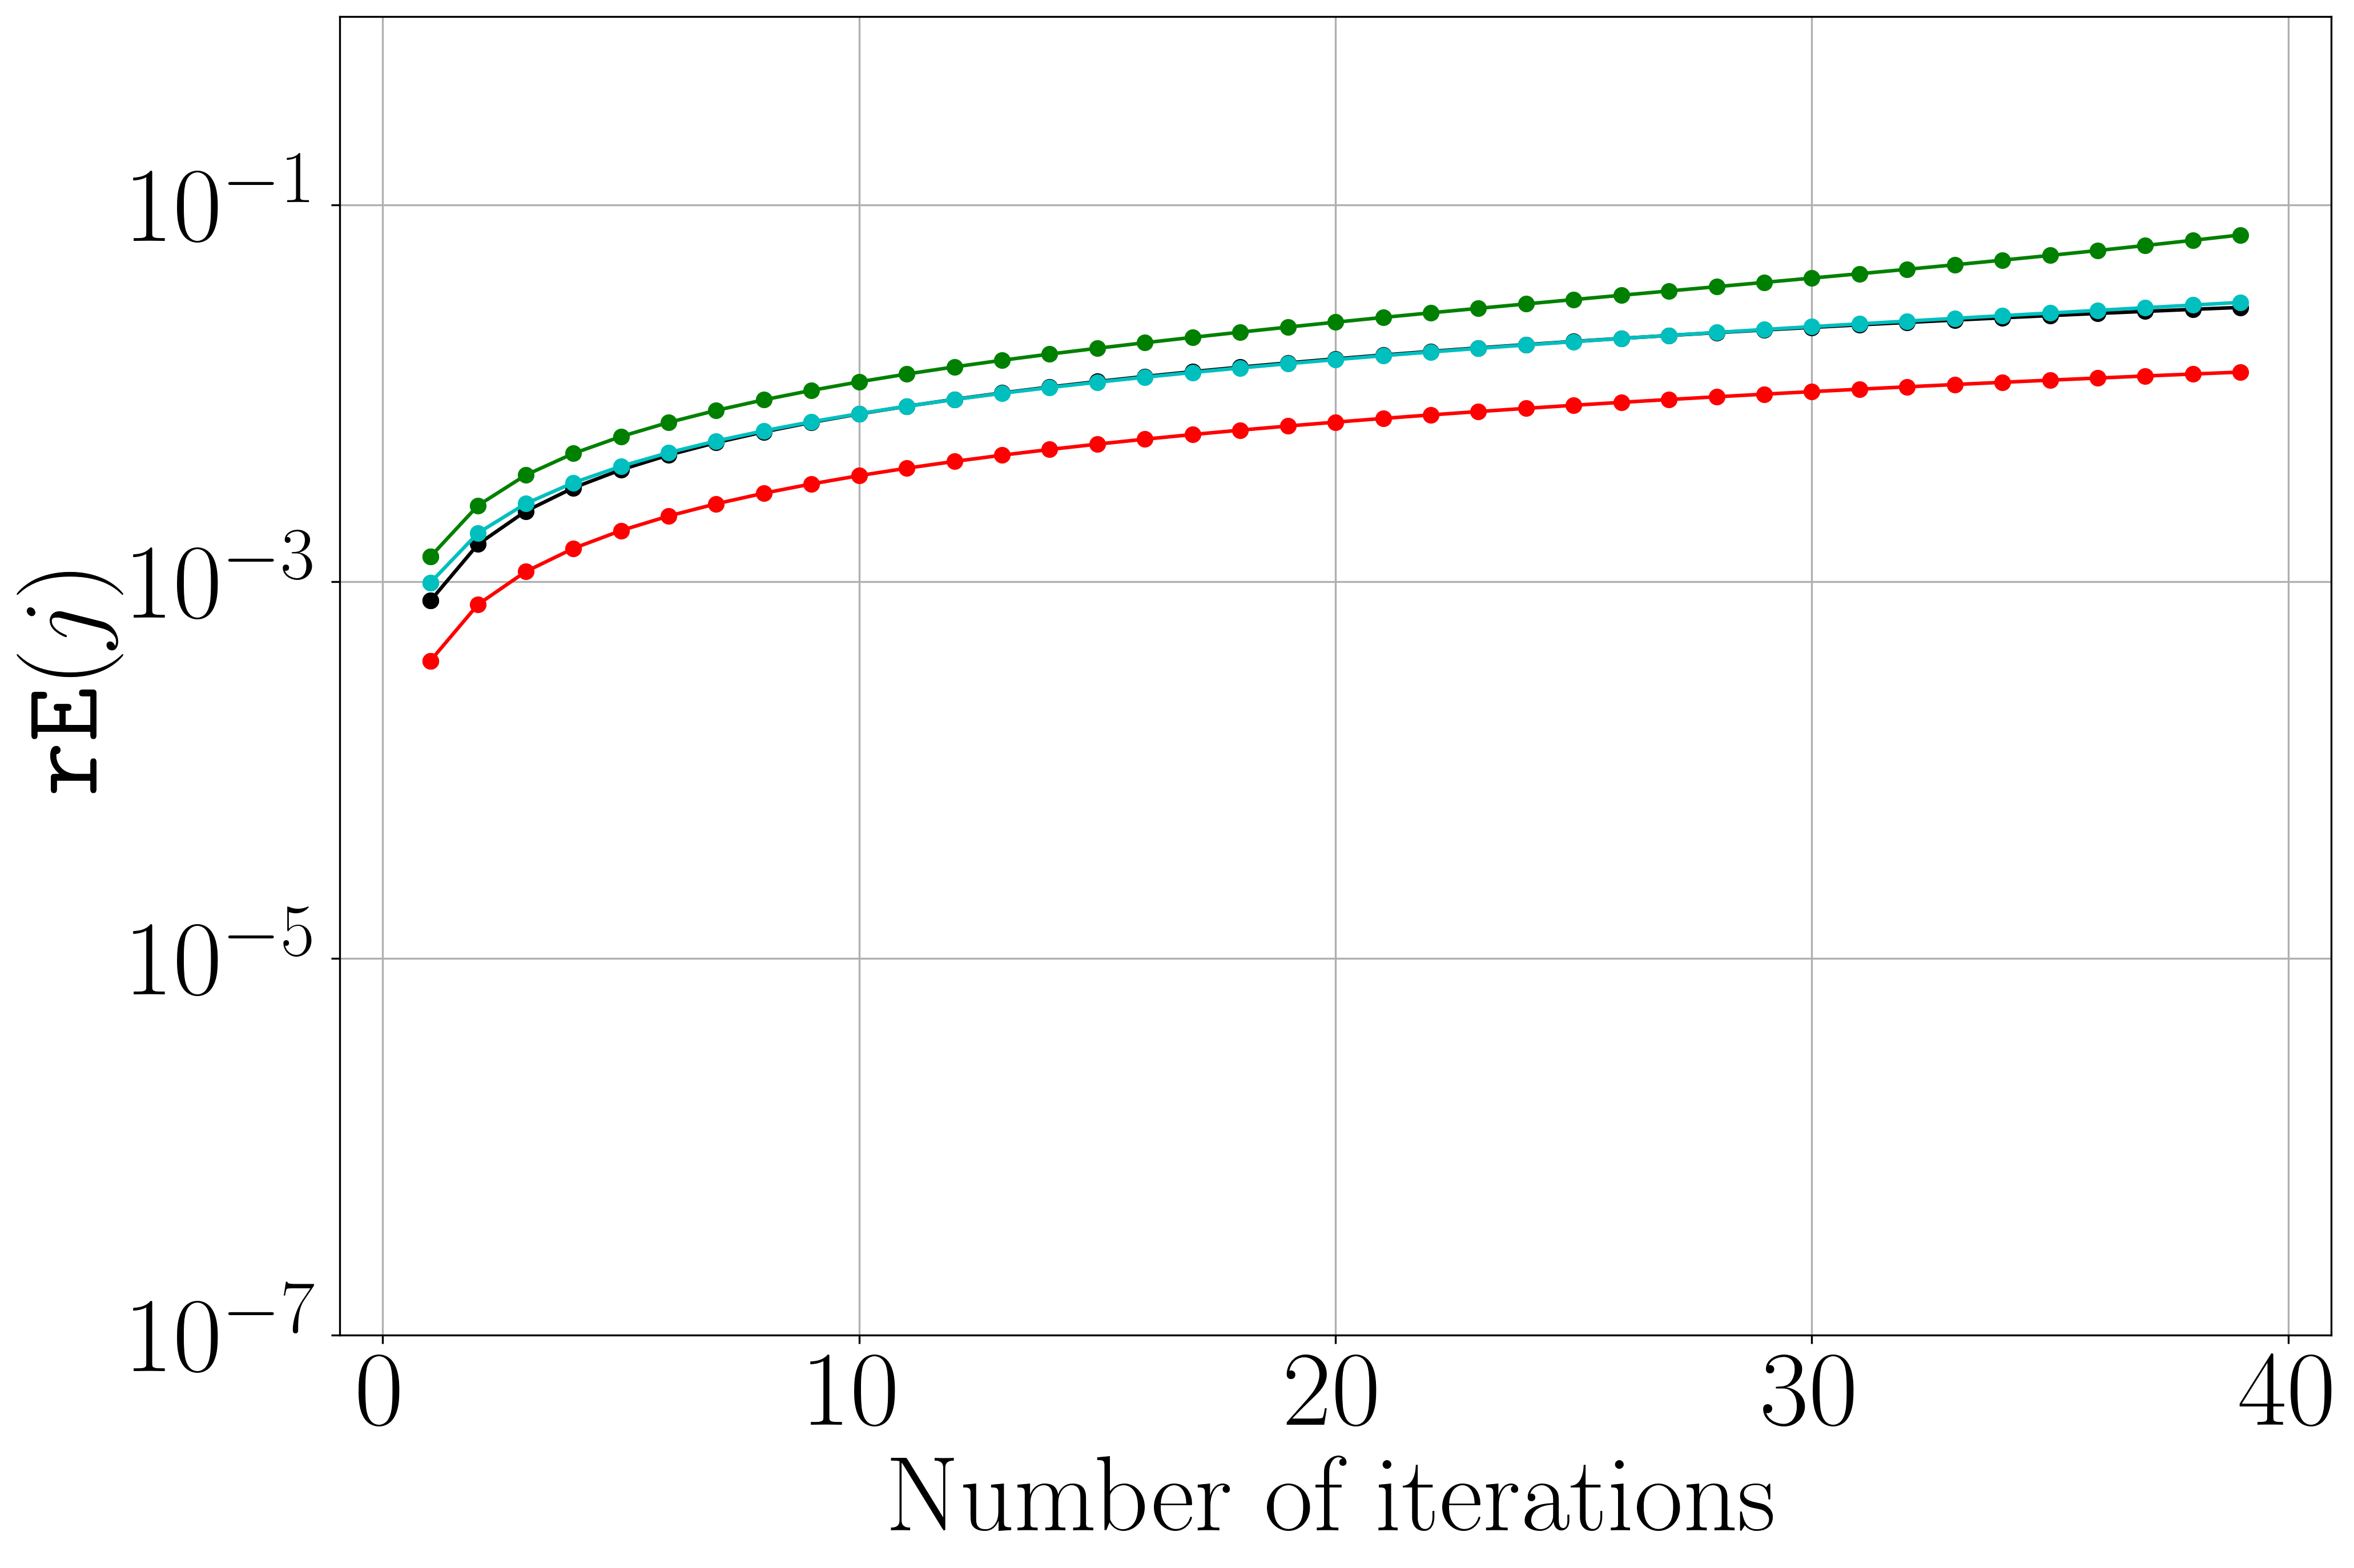

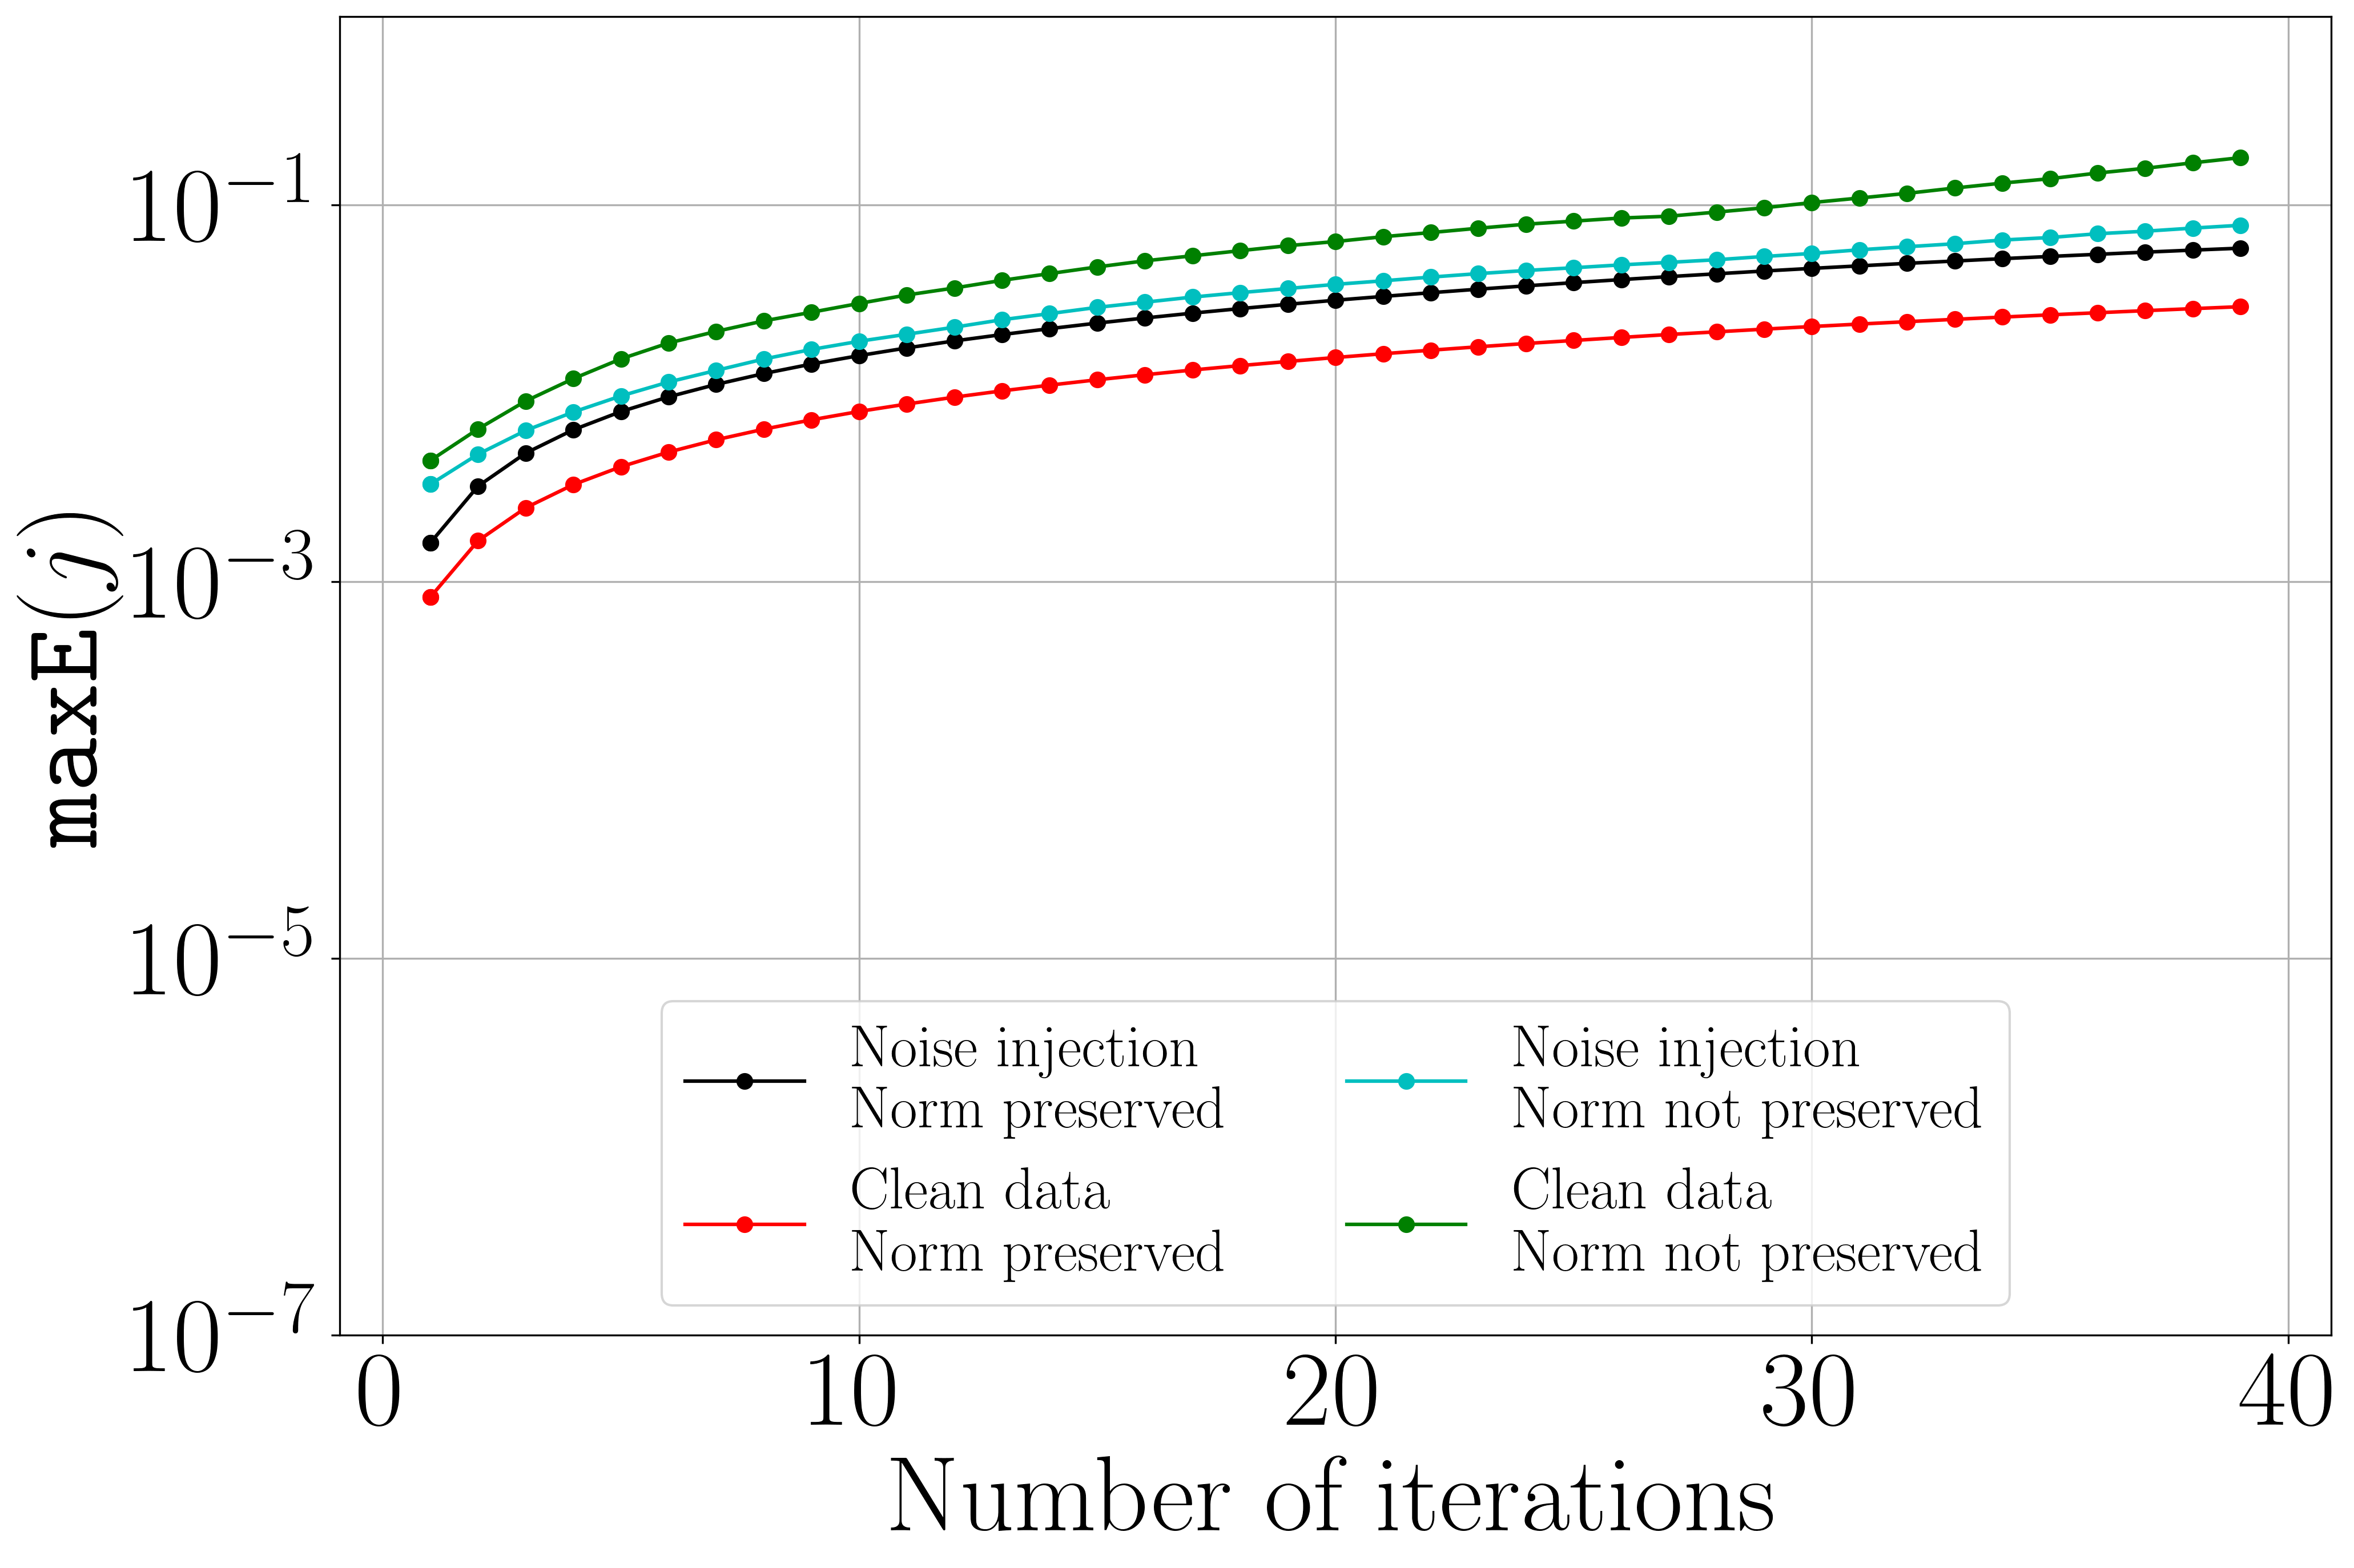

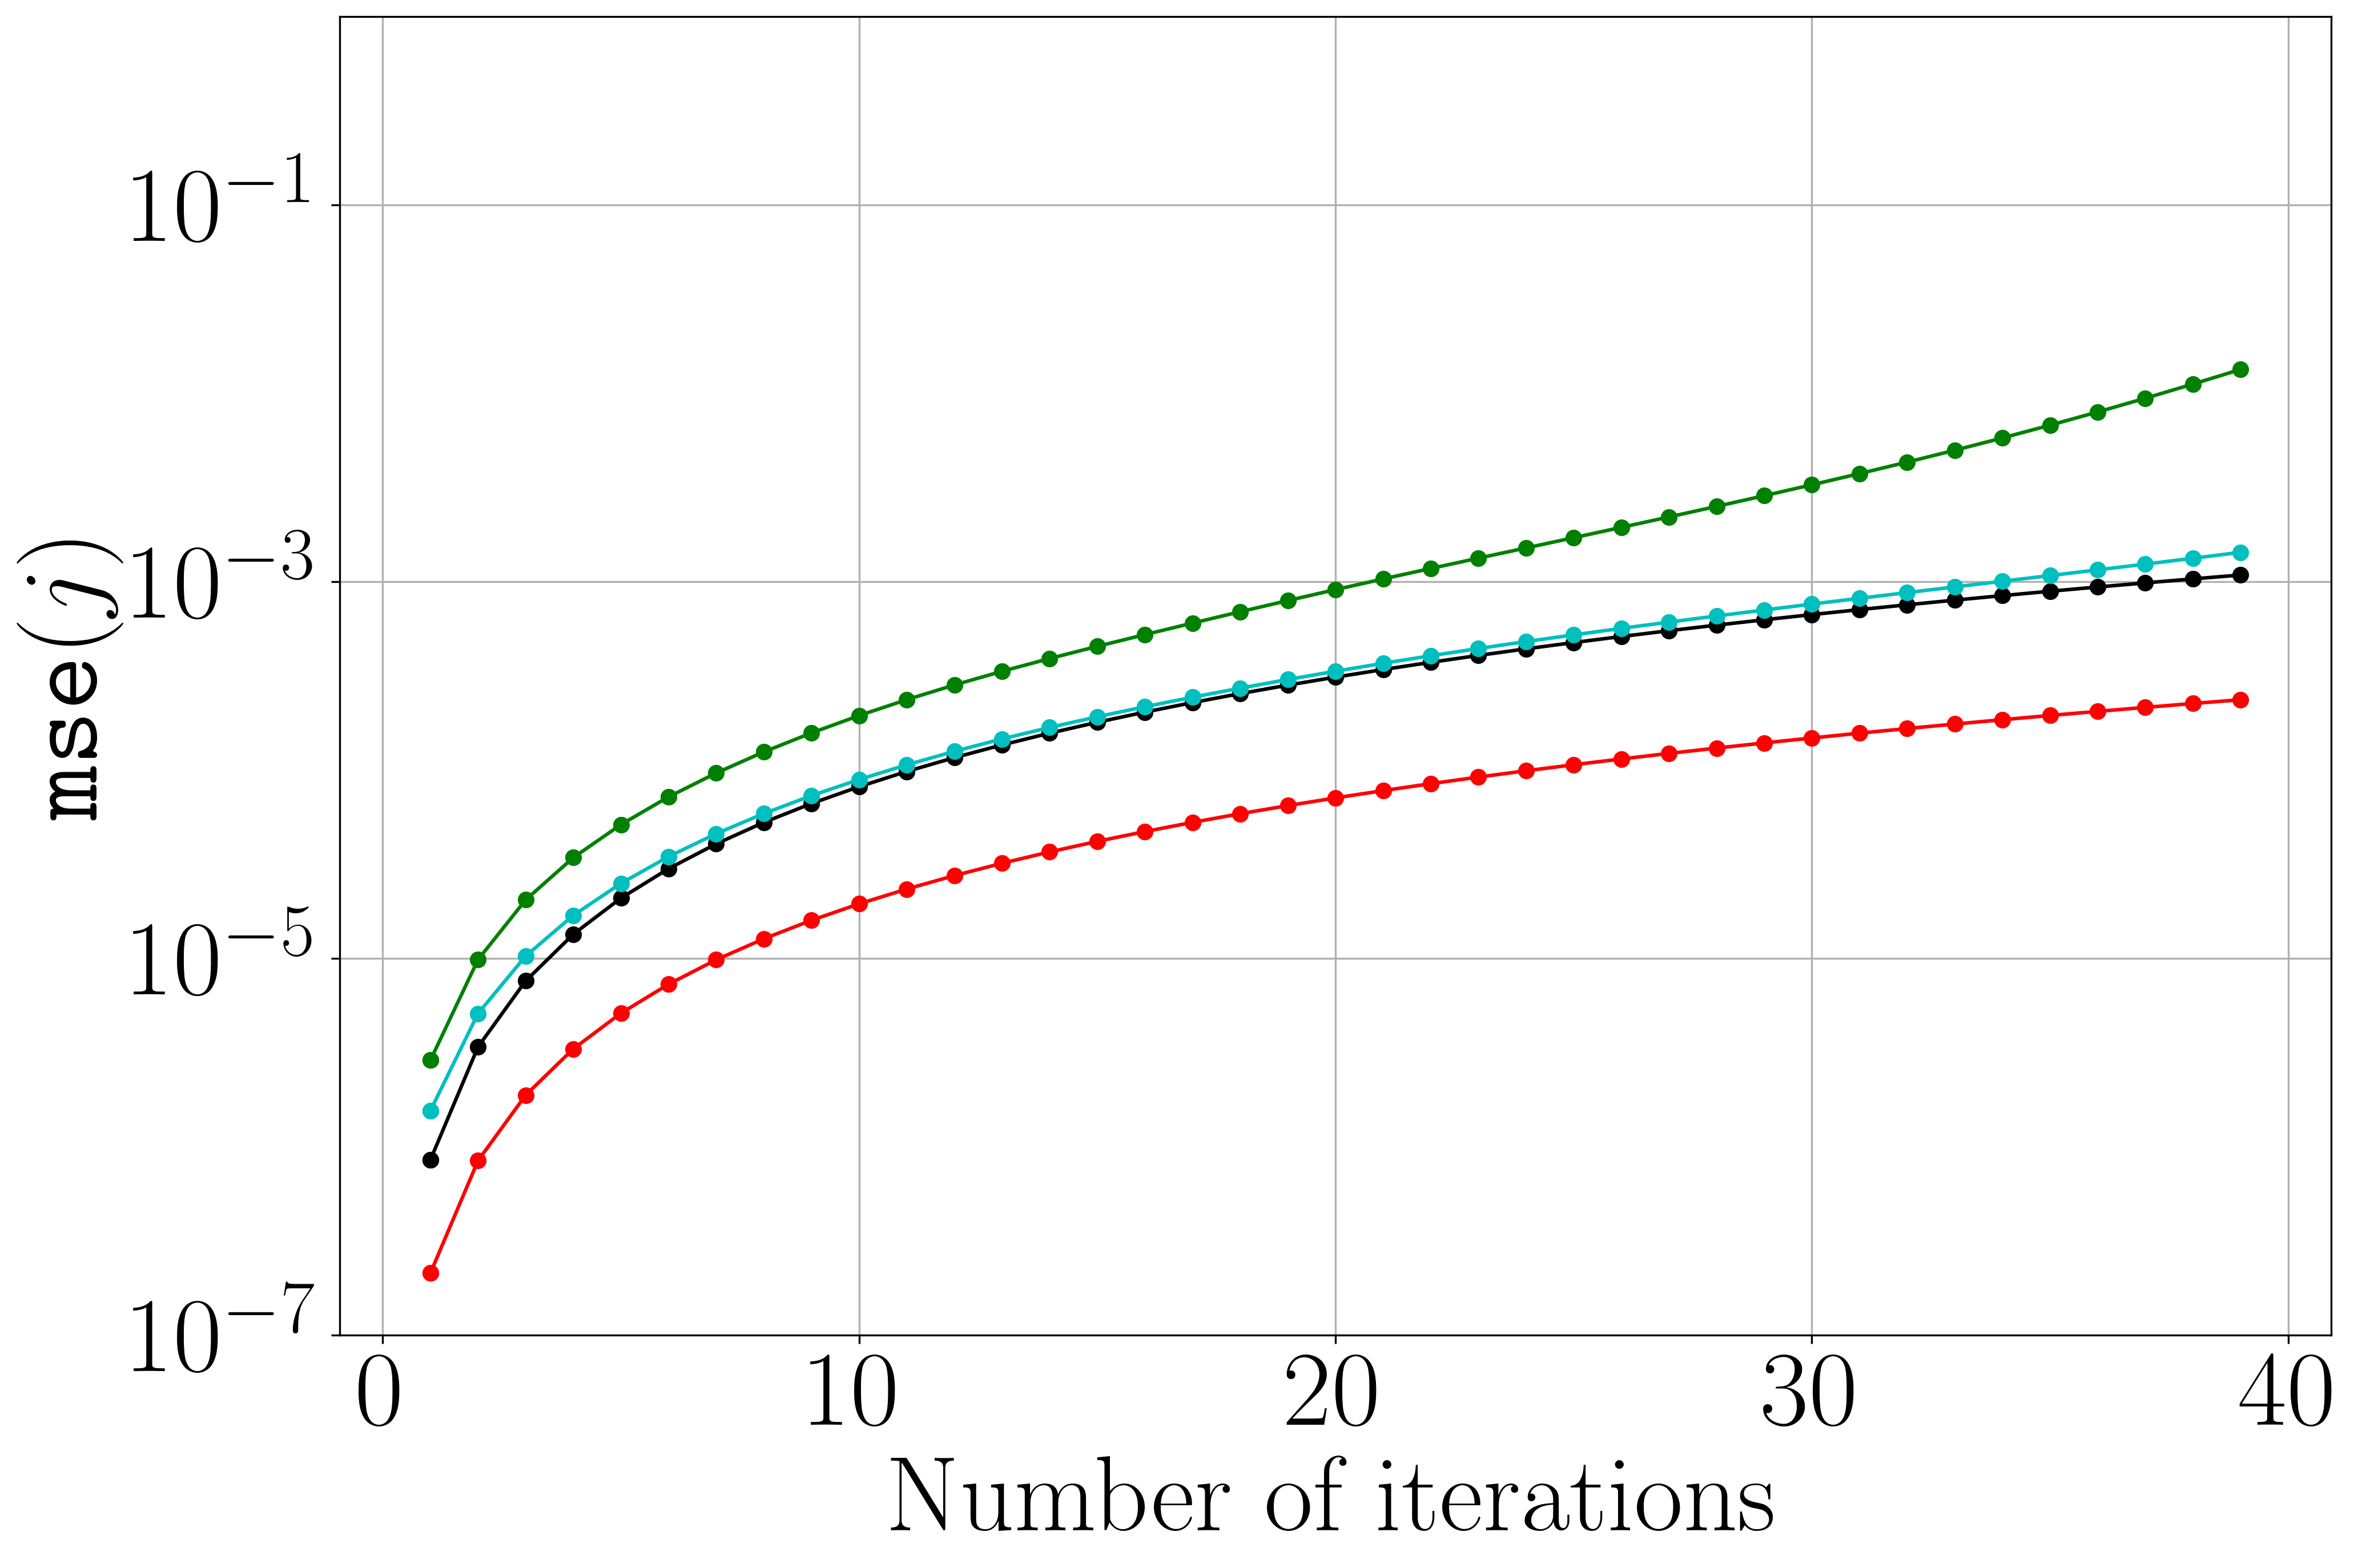

In [4]:
generate_error_plots()

In [5]:
from networkArchitecture import network
from create_dataset import get_train_test_split
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

pde_name = 'fisher'
kernel_size = 5
nlayers = 3

timesteps = 5
device = 'cpu'

dim = 100 #Size of the input matrices (100x100)
alpha = .01 #Diffusivity constant
xx = np.linspace(0,1,dim) #Spatial discretization of [0,1]
dx = xx[1]-xx[0] #Spatial step
dt = 0.1 if pde_name=='linadv' else 0.24 * dx**2 / alpha #Temporal step

preserve_norm = False
dtype = torch.float32
np_dtype = np.float32

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = network(pde_name=pde_name,
                kernel_size=kernel_size,
                nlayers=nlayers,
                dt=dt,
                preserve_norm=preserve_norm)

model.load_state_dict(torch.load("pretrained_models/FisherNoNoise.pt",map_location=device))
model.eval();
model.to('cpu');
trainset, testset = get_train_test_split(pde_name=pde_name,timesteps=timesteps,device=device,dtype=dtype)
testloader = torch.utils.data.DataLoader(testset,batch_size=30,shuffle=True,num_workers=0)

X,Y = next(iter(testloader))

X = X[13]
Y = Y[13]

ModuleNotFoundError: No module named 'networkArchitecture'

In [ ]:
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
matplotlib.rcParams['font.size']=45
#matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.family']= 'ptm' #'Times New Roman'
plt.rcParams["figure.autolayout"] = True

Traj = torch.cat((X,Y),dim=0)

res = X.clone()
res = res.unsqueeze(0)
print(res.shape)
for j in range(40):
 res = model(res)
res = res[0,0]
err = (res-Traj[40])

np.savetxt("saved_test_results/FisherInitial.csv", X.reshape(-1).detach().cpu().numpy(), delimiter=",")
np.savetxt("saved_test_results/FisherPredictionFinal.csv", res.reshape(-1).detach().cpu().numpy(), delimiter=",")
np.savetxt("saved_test_results/FisherTrueFinal.csv", Traj[40].reshape(-1).detach().cpu().numpy(), delimiter=",")
np.savetxt("saved_test_results/FisherErrorFinal.csv", err.reshape(-1).detach().cpu().numpy(), delimiter=",")

initial = pd.read_csv('saved_test_results/FisherInitial.csv',header=None)
finalTrue = pd.read_csv('saved_test_results/FisherTrueFinal.csv',header=None)
finalPred = pd.read_csv('saved_test_results/FisherPredictionFinal.csv',header=None)
difference = pd.read_csv('saved_test_results/FisherErrorFinal.csv',header=None)


initial = initial.to_numpy().reshape(100,100)
difference = difference.to_numpy().reshape(100,100)
finalTrue = finalTrue.to_numpy().reshape(100,100)
finalPred = finalPred.to_numpy().reshape(100,100)

fig = plt.figure(figsize=[10,10],dpi=300)
min = np.min(initial)
max = np.max(initial)
plt.imshow(initial,cmap = 'hot')
plt.xlabel(r"$x$",fontsize=45)
plt.ylabel(r"$y$",fontsize=45)
plt.yticks(fontsize=45)
plt.xticks(fontsize=45)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=45)
plt.clim(min,max);
plt.title("Initial condition",fontsize=45)
plt.savefig("saved_plots/FisherInitial.pdf", format="pdf")
plt.show();

fig = plt.figure(figsize=[10,10],dpi=300)
plt.imshow(finalPred,cmap = 'hot')
plt.xlabel(r"$x$",fontsize=45)
plt.ylabel(r"$y$",fontsize=45)
plt.yticks(fontsize=45)
plt.xticks(fontsize=45)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=45)
#plt.clim(min,max);
plt.title("Predicted matrix",fontsize=45)
plt.savefig("saved_plots/FisherFinalPred.pdf", format="pdf")
plt.show();

fig = plt.figure(figsize=[10,10],dpi=300)
plt.imshow(finalTrue,cmap = 'hot')
plt.xlabel(r"$x$",fontsize=45)
plt.ylabel(r"$y$",fontsize=45)
plt.yticks(fontsize=45)
plt.xticks(fontsize=45)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=45)
#plt.clim(min,max);
plt.title("True matrix",fontsize=45)
plt.savefig("saved_plots/FisherFinalTrue.pdf", format="pdf")
plt.show();

fig = plt.figure(figsize=[10,10],dpi=300)
plt.imshow(difference,cmap = 'hot')
plt.xlabel(r"$x$",fontsize=45)
plt.ylabel(r"$y$",fontsize=45)
plt.yticks(fontsize=45)
plt.xticks(fontsize=45)
cbar = plt.colorbar(format='%.0e')
cbar.ax.tick_params(labelsize=45)
#plt.clim(min,max);
plt.title("Difference",fontsize=45)
plt.savefig("saved_plots/FisherFinalDifference.pdf", format="pdf")
plt.show();